# **Đồ án giữa kì - Trực quan hóa dữ liệu**

## **0. Mục lục**

## **1. Giới thiệu chung**

### **1.1. Thông tin nhóm**

**Nhóm 9 gồm 5 thành viên:**
| MSSV     | Họ và tên               |
|:--------:|:-----------------------:|
| 21127399 | Nguyễn Đỗ Nguyên Phương |
| 22127081 | Huỳnh Lê Hải Dương      |
| 22127117 | Lý Liên Hoa             |
| 22127352 | Võ Anh Quân             |
| 22127358 | Phạm Văn Quyến          |

### **1.2. Giới thiệu đồ án**

- Bệnh tim mạch là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, trong đó đau tim (heart attack) là một tình trạng nghiêm trọng. Dự án này tập trung vào việc phân tích dữ liệu liên quan đến nguy cơ đau tim dựa trên dataset [Heart Attack Prediction in United States](https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states/data?fbclid=IwZXh0bgNhZW0CMTEAAR0Zu-7XwdYN0O6wjPHv9WwsyYfd0hKNYf2avMuCTFQ0L7ZpWZNemvngpTI_aem_k-7lMUwF3cQjxsToxqIgOg) từ Kaggle. 

- Mục tiêu chính là phân tích, khám phá và hiểu rõ các yếu tố nào có ảnh hưởng lớn đến nguy cơ đau tim, từ đó cung cấp những thông tin hữu ích cho y tế và sức khỏe cộng đồng.

## **1. Thu thập dữ liệu**

### **1.1. Về dataset**

- Bộ dữ liệu này chứa thông tin về các yếu tố sức khỏe và lối sống khác nhau có thể ảnh hưởng đến các cơn đau tim ở Hoa Kỳ. Nó bao gồm các chi tiết như tuổi tác, cholesterol, huyết áp và thói quen hút thuốc, cùng với kết quả là liệu một cơn đau tim có xảy ra hay không.
- Mục tiêu là giúp xác định các rủi ro và xu hướng tiềm năng có thể dẫn đến nhận thức và phòng ngừa sức khỏe tim mạch tốt hơn.

### **1.2. Giấy phép và bản quyền**

- [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/)
- Không có bản quyền.

### **1.3. Tác giả đã thu thập dữ liệu như thế nào?**

Tác giả đã sử dụng phương pháp **cào web** để cào trên 3 trang web dữ liệu khác nhau. Kết quả cuối cùng, bộ dataset có tổng cộng **32 thuộc tính** khác nhau có thể ảnh hưởng đến bệnh tim mạch (bao gồm Gender, Cholesterol, BloodPressure, HeartRate, ...) và **372,974 bản ghi**.

## **2. Tiền xử lý dữ liệu**

### **2.1. Khai báo thư viện**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### **2.2. Thiết lập lựa chọn trình bày**

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

### **2.3. Đọc và dịch nội dung tập dữ liệu**

- Đọc dữ liệu ban đầu. Dữ liệu được lưu trữ với ngôn ngữ **Tiếng Anh** nên cần được **dịch sang Tiếng Việt** để thuận tiện cho quá trình phân tích và trực quan hóa.

In [4]:
file_path = 'heart_attack_dataset.csv'
df = pd.read_csv(file_path)

- Đầu tiên, cần trích xuất tất cả từ **duy nhất** và lưu trữ lại.

In [5]:
string_columns = df.select_dtypes(include=['object']).columns

unique_values = set()
for column in string_columns:
    unique_values.update(df[column].dropna().unique())
column_names = set(df.columns)

with open('unique_values.txt', 'w', encoding='utf-8') as f:
    for name in sorted(column_names):
        f.write(f"{name}\n")
    
    for value in sorted(unique_values):
        f.write(f"{value}\n")

print(f"Đã ghi {len(unique_values)} giá trị duy nhất và {len(column_names)} tên cột vào 'unique_values.txt'")

Đã ghi 39 giá trị duy nhất và 32 tên cột vào 'unique_values.txt'


- Tiếp theo, cần dịch nội dung trong file `unique_values.txt` sang **Tiếng Việt**. Có thể sử dụng một số thư viện như `deep_translator`, `translate`, hoặc `google-cloud-translate` để hỗ trợ dịch thuật.
- Tuy nhiên, để đảm bảo độ chính xác và phù hợp với ngữ cảnh, nhóm ưu tiên chọn cách dịch thủ công và lưu lại trong file `translated_values.txt`.

- Cuối cùng, sử dụng nội dung đã dịch trong `translated_values.txt` để ánh xạ và thay thế trực tiếp các giá trị trong tập dữ liệu, đảm bảo dữ liệu đầu ra được dịch chính xác và nhất quán.  
- Lưu lại dữ liệu đã tiền xử lý.

In [6]:
translation_map = {}
with open('translated_values.txt', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            key, value = line.strip().split(' => ')
            translation_map[key] = value
        except ValueError:
            print(f"⚠️ Lỗi khi xử lý dòng: {line}")

df.rename(columns=translation_map, inplace=True)

string_columns = df.select_dtypes(include=['object']).columns
for column in string_columns:
    df[column] = df[column].map(translation_map).fillna(df[column])

output_path = 'heart_attack_dataset_vi.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"Đã lưu file dịch thành công vào '{output_path}'")

Đã lưu file dịch thành công vào 'heart_attack_dataset_vi.csv'


## **3. Khám phá dữ liệu**

### **3.1. Tổng quan về bộ dữ liệu**

**Đọc dữ liệu**

In [7]:
file_path = 'heart_attack_dataset_vi.csv'
df = pd.read_csv(file_path)

**Kích thước bộ dữ liệu**

In [8]:
n_rows, n_cols = df.shape
print(f'Số lượng dòng (bản ghi): {n_rows}')
print(f'Số lượng cột (thuộc tính): {n_cols}')

Số lượng dòng (bản ghi): 372974
Số lượng cột (thuộc tính): 32


Dữ liệu gồm 372974 dòng và 32 cột.

Đây là 5 dòng đầu tiện của bộ dữ liệu:

In [9]:
df.head()

,Tuổi,Giới tính,Cholesterol,Huyết áp,Nhịp tim,Chỉ số BMI,Hút thuốc,Tiểu đường,Tăng huyết áp,Tiền sử gia đình,Hoạt động thể chất,Tiêu thụ Rượu/Bia,Chế độ ăn uống,Mức độ căng thẳng,Dân tộc,Thu nhập,Trình độ Học vấn,Thuốc men,Loại Đau Ngực,Kết quả ECG,Nhịp tim tối đa,Độ trũng ST,Đau thắt ngực do tập thể dục,Độ dốc ST,Số mạch máu chính,Bệnh Thalassemia,Tiền sử Nhồi máu cơ tim,Tiền sử Đột quỵ,Nơi ở,Tình trạng Việc làm,Tình trạng Hôn nhân,Kết quả
0,31,Nam,194,162,71,22.9,0,1,0,0,6,0,Không khỏe mạnh,1,Người gốc Tây Ban Nha,64510,Trung học phổ thông,1,Điển hình,Bất thường ST-T,173,0.52,1,Dốc xuống,1,Bình thường,0,0,Ngoại ô,Đã nghỉ hưu,Độc thân,0
1,69,Nam,208,148,93,33.9,1,1,0,0,1,2,Không khỏe mạnh,6,Người châu Á,91773,Đại học,0,Không điển hình,Phì đại thất trái,189,3.79,1,Dốc lên,2,Bình thường,0,0,Ngoại ô,Thất nghiệp,Đã kết hôn,0
2,34,Nữ,132,161,94,34.0,0,0,1,1,1,3,Khỏe mạnh,3,Người da đen,173550,Đại học,0,Không phải đau thắt ngực,Bình thường,122,0.17,1,Dốc lên,0,Bình thường,1,0,Nông thôn,Đã nghỉ hưu,Độc thân,1
3,53,Nam,268,134,91,35.0,0,1,1,0,6,0,Khỏe mạnh,3,Người gốc Tây Ban Nha,43861,Trung học phổ thông,1,Không điển hình,Bất thường ST-T,104,0.67,1,Phẳng,0,Khuyết tật có thể phục hồi,1,0,Ngoại ô,Đã nghỉ hưu,Góa bụa,0
4,57,Nữ,203,140,75,30.1,0,1,0,0,4,1,Vừa phải,1,Người gốc Tây Ban Nha,83404,Trung học phổ thông,1,Điển hình,Bất thường ST-T,126,5.00,1,Phẳng,0,Khuyết tật cố định,1,0,Nông thôn,Đã nghỉ hưu,Đã kết hôn,1


### **3.2. Chi tiết các dòng dữ liệu**  

**Ý nghĩa của từng dòng**  

- Tập dữ liệu bao gồm thông tin chi tiết về sức khỏe tim mạch của từng bệnh nhân, trong đó mỗi dòng tương ứng với hồ sơ sức khỏe của một cá nhân. Mỗi hồ sơ chứa các thông tin y tế, lối sống và nhân khẩu học của bệnh nhân, cung cấp cái nhìn toàn diện về các yếu tố ảnh hưởng đến sức khỏe tim mạch.  
- Dữ liệu được cấu trúc để mỗi dòng đại diện cho một bệnh nhân duy nhất, cho phép phân tích chi tiết về các yếu tố nguy cơ, tình trạng sức khỏe và kết quả chẩn đoán.  
- Việc phân tích từng dòng dữ liệu cho phép xác định các mối liên hệ tiềm ẩn giữa lối sống, bệnh nền và nguy cơ mắc bệnh tim mạch, từ đó đưa ra các khuyến nghị điều trị và phòng ngừa phù hợp.  

**Kiểm tra trùng lặp**

In [10]:
duplicated_rows = df.duplicated().sum()
print(f"Số lượng dòng bị trùng: {duplicated_rows}")

Số lượng dòng bị trùng: 0


Dữ liệu không có dòng nào bị trùng lập.

### **3.3. Chi tiết các cột dữ liệu**  

**Ý nghĩa từng cột**

In [11]:
description = pd.read_csv('description.csv')
description

,Tên Cột,Ý Nghĩa
0,Tuổi,Tuổi của bệnh nhân (tính theo năm)
1,Giới tính,Giới tính của bệnh nhân (Nam/Nữ)
2,Cholesterol,Mức độ cholesterol trong máu (mg/dL)
3,Huyết áp,Huyết áp tâm thu của bệnh nhân (mm Hg)
4,Nhịp tim,Nhịp tim khi nghỉ của bệnh nhân (bpm)
5,Chỉ số BMI,Chỉ số khối cơ thể (Body Mass Index)
6,Hút thuốc,Tình trạng hút thuốc (Có/Không)
7,Tiểu đường,Bệnh nhân có tiền sử tiểu đường hay không (Có/Không)
8,Tăng huyết áp,Bệnh nhân có bị tăng huyết áp hay không (Có/Không)
9,Tiền sử gia đình,Tiền sử bệnh tim mạch trong gia đình (Có/Không)


**Thông tin của tập dữ liệu**

In [12]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Tuổi                          372974 non-null  int64  
 1   Giới tính                     372974 non-null  object 
 2   Cholesterol                   372974 non-null  int64  
 3   Huyết áp                      372974 non-null  int64  
 4   Nhịp tim                      372974 non-null  int64  
 5   Chỉ số BMI                    372974 non-null  float64
 6   Hút thuốc                     372974 non-null  int64  
 7   Tiểu đường                    372974 non-null  int64  
 8   Tăng huyết áp                 372974 non-null  int64  
 9   Tiền sử gia đình              372974 non-null  int64  
 10  Hoạt động thể chất            372974 non-null  int64  
 11  Tiêu thụ Rượu/Bia             372974 non-null  int64  
 12  Chế độ ăn uống                372974 non-nul

**Kiểu dữ liệu của mỗi cột**

In [13]:
df.dtypes

Tuổi                              int64
Giới tính                        object
Cholesterol                       int64
Huyết áp                          int64
Nhịp tim                          int64
Chỉ số BMI                      float64
Hút thuốc                         int64
Tiểu đường                        int64
Tăng huyết áp                     int64
Tiền sử gia đình                  int64
Hoạt động thể chất                int64
Tiêu thụ Rượu/Bia                 int64
Chế độ ăn uống                   object
Mức độ căng thẳng                 int64
Dân tộc                          object
Thu nhập                          int64
Trình độ Học vấn                 object
Thuốc men                         int64
Loại Đau Ngực                    object
Kết quả ECG                      object
Nhịp tim tối đa                   int64
Độ trũng ST                     float64
Đau thắt ngực do tập thể dục      int64
Độ dốc ST                        object
Số mạch máu chính                 int64


**Dữ liệu thiếu ở mỗi cột**

In [14]:
missing_values_sum = df.isnull().sum()
print(f"Tổng dữ liệu thiếu ở mỗi cột: \n{missing_values_sum}")

Tổng dữ liệu thiếu ở mỗi cột: 
Tuổi                            0
Giới tính                       0
Cholesterol                     0
Huyết áp                        0
Nhịp tim                        0
Chỉ số BMI                      0
Hút thuốc                       0
Tiểu đường                      0
Tăng huyết áp                   0
Tiền sử gia đình                0
Hoạt động thể chất              0
Tiêu thụ Rượu/Bia               0
Chế độ ăn uống                  0
Mức độ căng thẳng               0
Dân tộc                         0
Thu nhập                        0
Trình độ Học vấn                0
Thuốc men                       0
Loại Đau Ngực                   0
Kết quả ECG                     0
Nhịp tim tối đa                 0
Độ trũng ST                     0
Đau thắt ngực do tập thể dục    0
Độ dốc ST                       0
Số mạch máu chính               0
Bệnh Thalassemia                0
Tiền sử Nhồi máu cơ tim         0
Tiền sử Đột quỵ                 0
Nơi ở            

Không có cột nào bị thiếu dữ liệu.

**Thống kê cơ bản của dữ liệu số**

In [15]:
print("Thống kê cơ bản của dữ liệu cột số:")
df.describe()

Thống kê cơ bản của dữ liệu cột số:


,Tuổi,Cholesterol,Huyết áp,Nhịp tim,Chỉ số BMI,Hút thuốc,Tiểu đường,Tăng huyết áp,Tiền sử gia đình,Hoạt động thể chất,Tiêu thụ Rượu/Bia,Mức độ căng thẳng,Thu nhập,Thuốc men,Nhịp tim tối đa,Độ trũng ST,Đau thắt ngực do tập thể dục,Số mạch máu chính,Tiền sử Nhồi máu cơ tim,Tiền sử Đột quỵ,Kết quả
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,3.003475,2.000048,5.001885,110033.409913,0.499895,149.463896,2.501799,0.499962,1.498525,0.496938,0.500815,0.499542
std,15.867016,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,2.000114,1.414572,2.582025,51961.721991,0.500001,28.849990,1.443696,0.500001,1.118003,0.499991,0.500000,0.500000
min,30.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,64957.250000,0.000000,124.000000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,110111.000000,0.000000,149.000000,2.500000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,7.000000,155012.000000,1.000000,174.000000,3.750000,1.000000,2.000000,1.000000,1.000000,1.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,9.000000,199999.000000,1.000000,199.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [16]:
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols

Index(['Tuổi', 'Cholesterol', 'Huyết áp', 'Nhịp tim', 'Chỉ số BMI',
       'Hút thuốc', 'Tiểu đường', 'Tăng huyết áp', 'Tiền sử gia đình',
       'Hoạt động thể chất', 'Tiêu thụ Rượu/Bia', 'Mức độ căng thẳng',
       'Thu nhập', 'Thuốc men', 'Nhịp tim tối đa', 'Độ trũng ST',
       'Đau thắt ngực do tập thể dục', 'Số mạch máu chính',
       'Tiền sử Nhồi máu cơ tim', 'Tiền sử Đột quỵ', 'Kết quả'],
      dtype='object')

In [17]:
categorical_cols = df.select_dtypes(exclude='number').columns
categorical_cols

Index(['Giới tính', 'Chế độ ăn uống', 'Dân tộc', 'Trình độ Học vấn',
       'Loại Đau Ngực', 'Kết quả ECG', 'Độ dốc ST', 'Bệnh Thalassemia',
       'Nơi ở', 'Tình trạng Việc làm', 'Tình trạng Hôn nhân'],
      dtype='object')

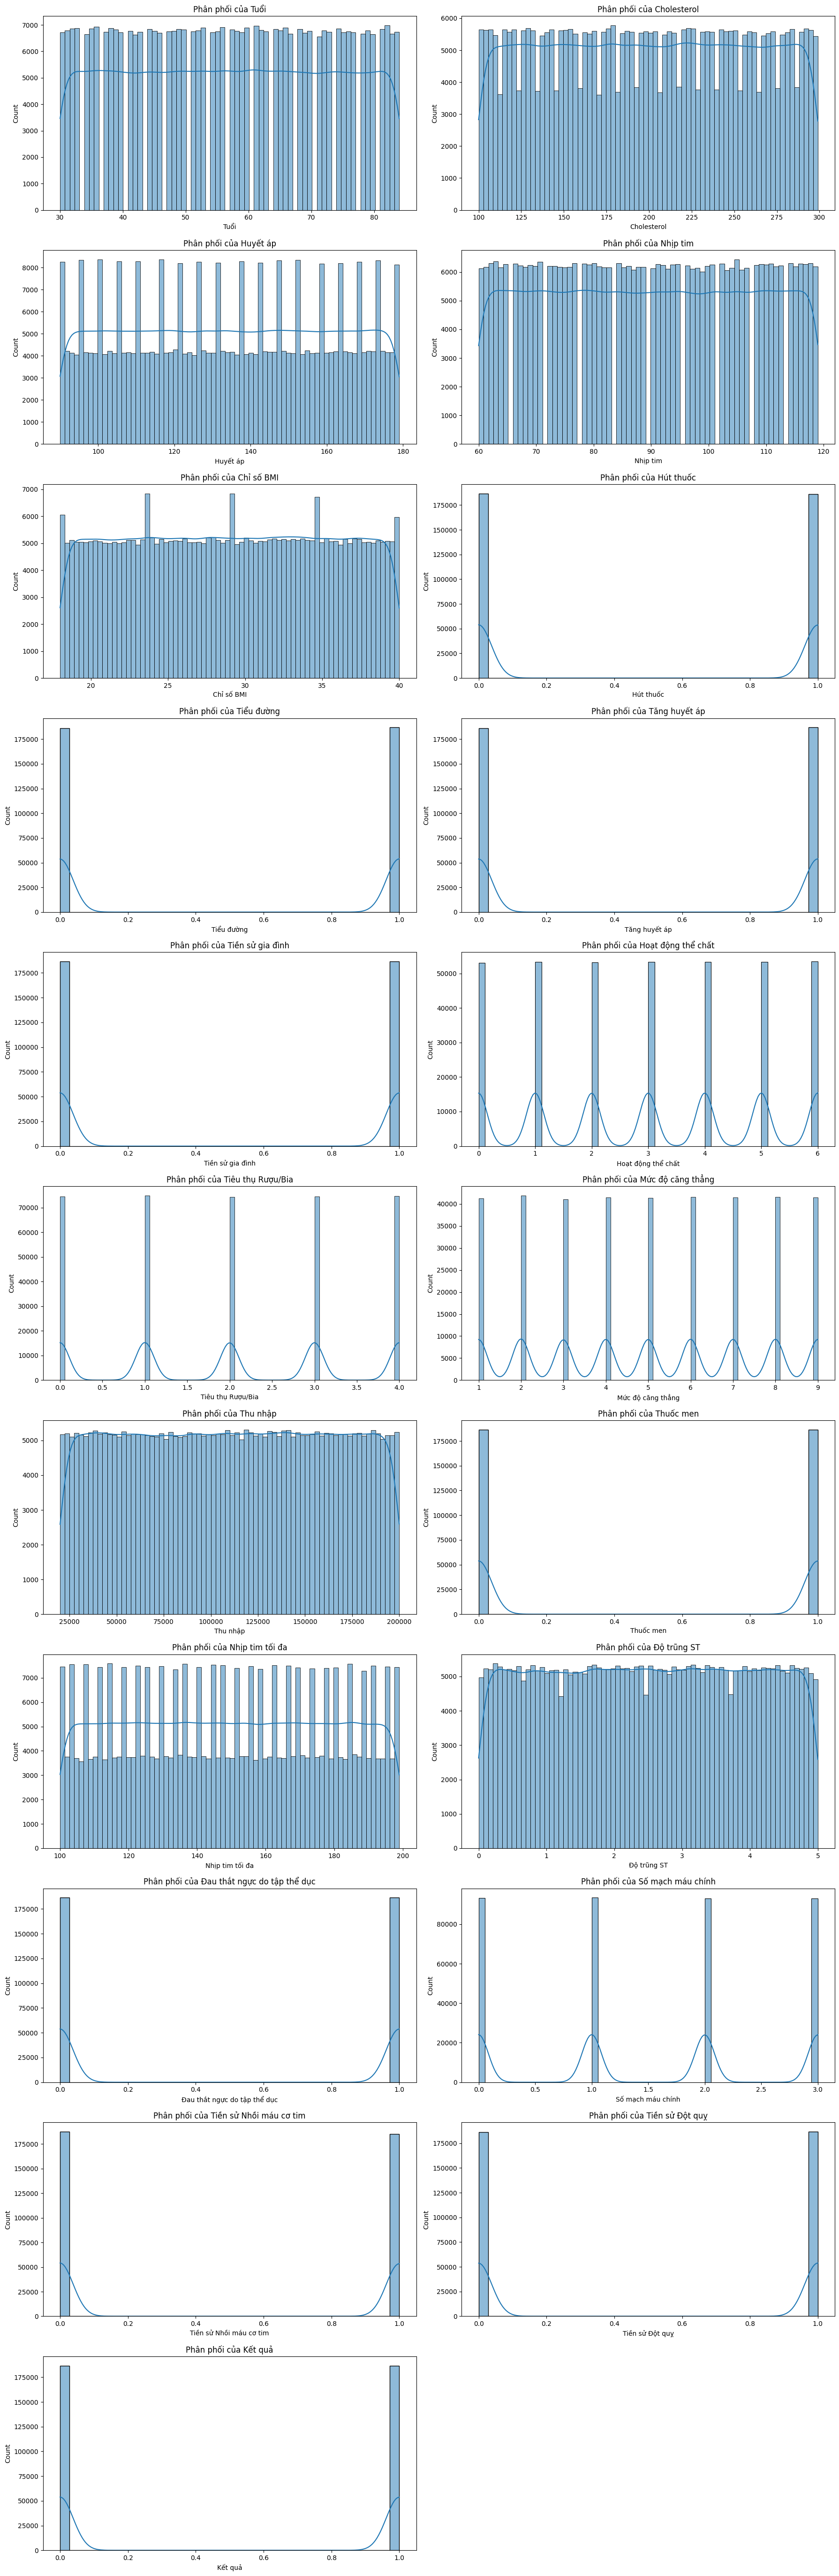

In [18]:
num_numerical = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

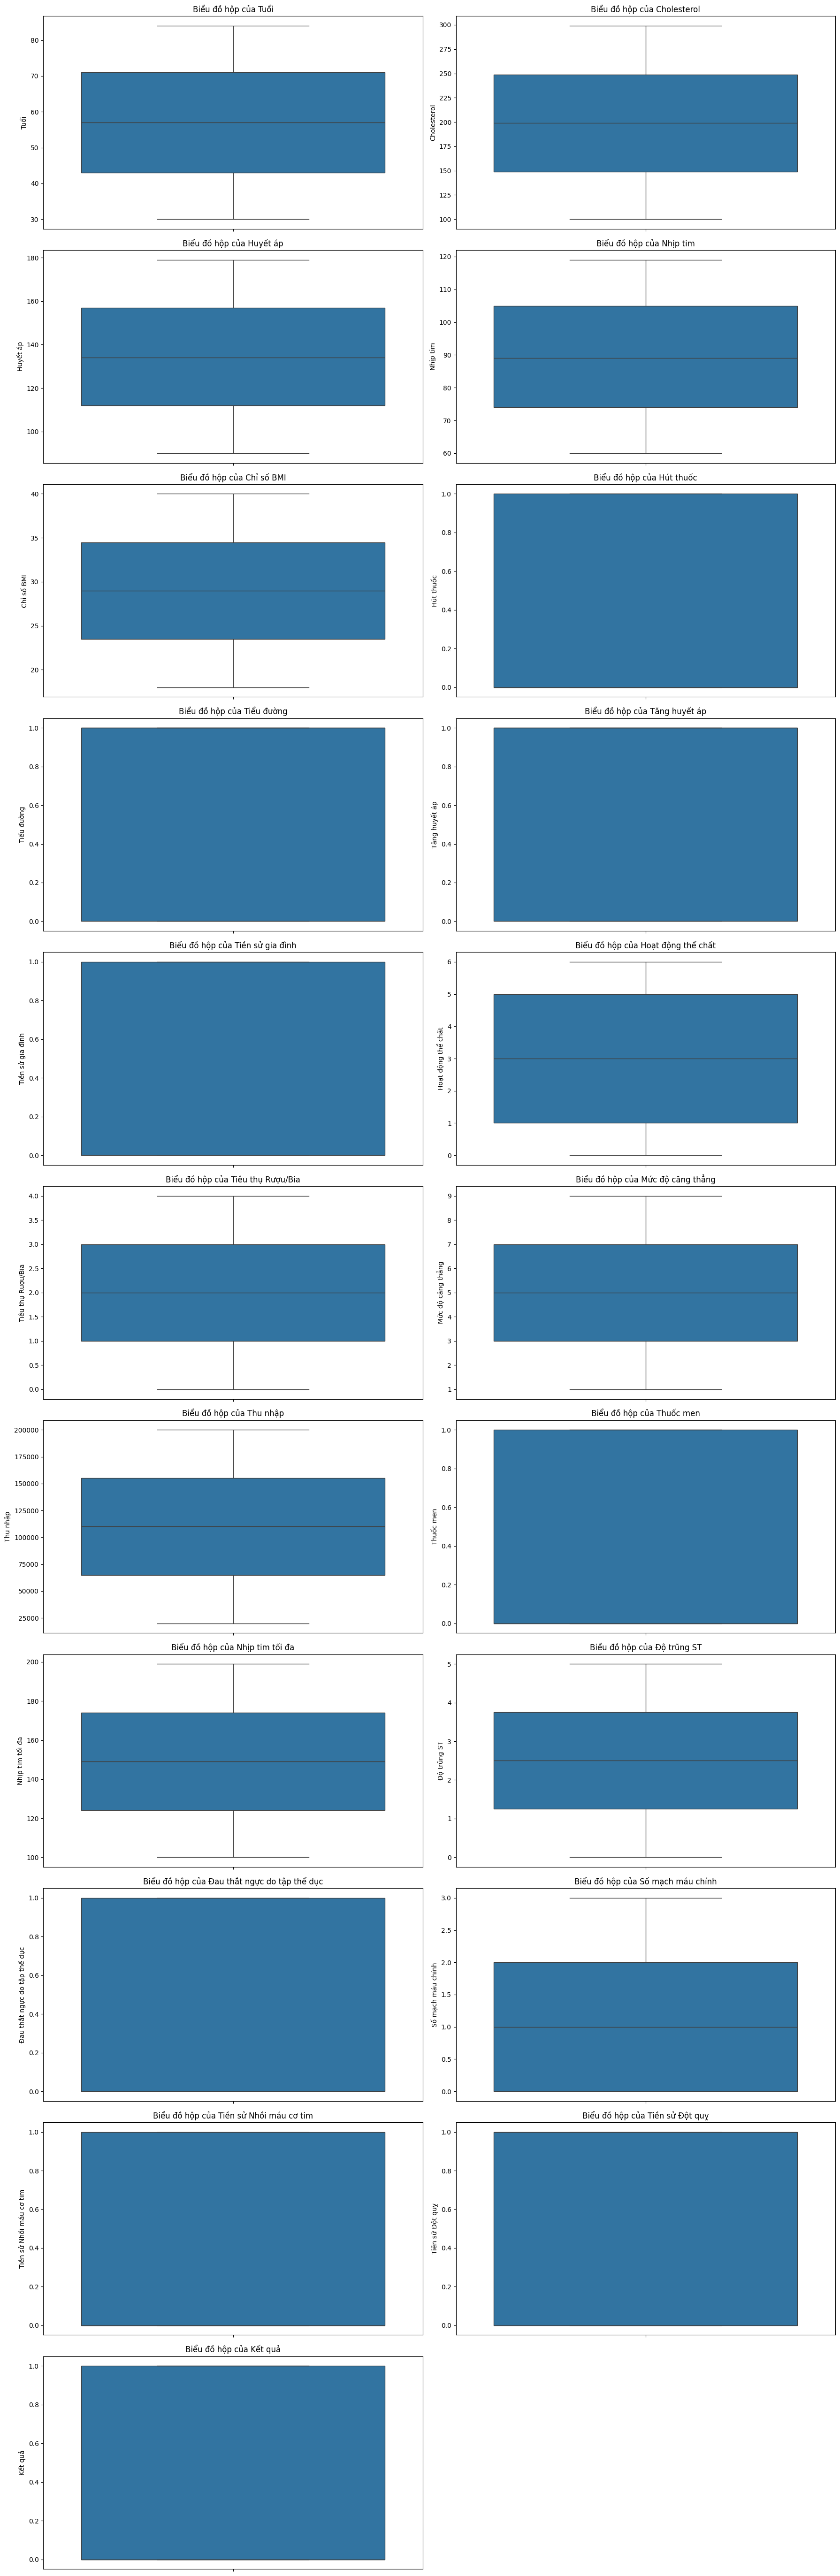

In [19]:
num_numerical = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Biểu đồ hộp của {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

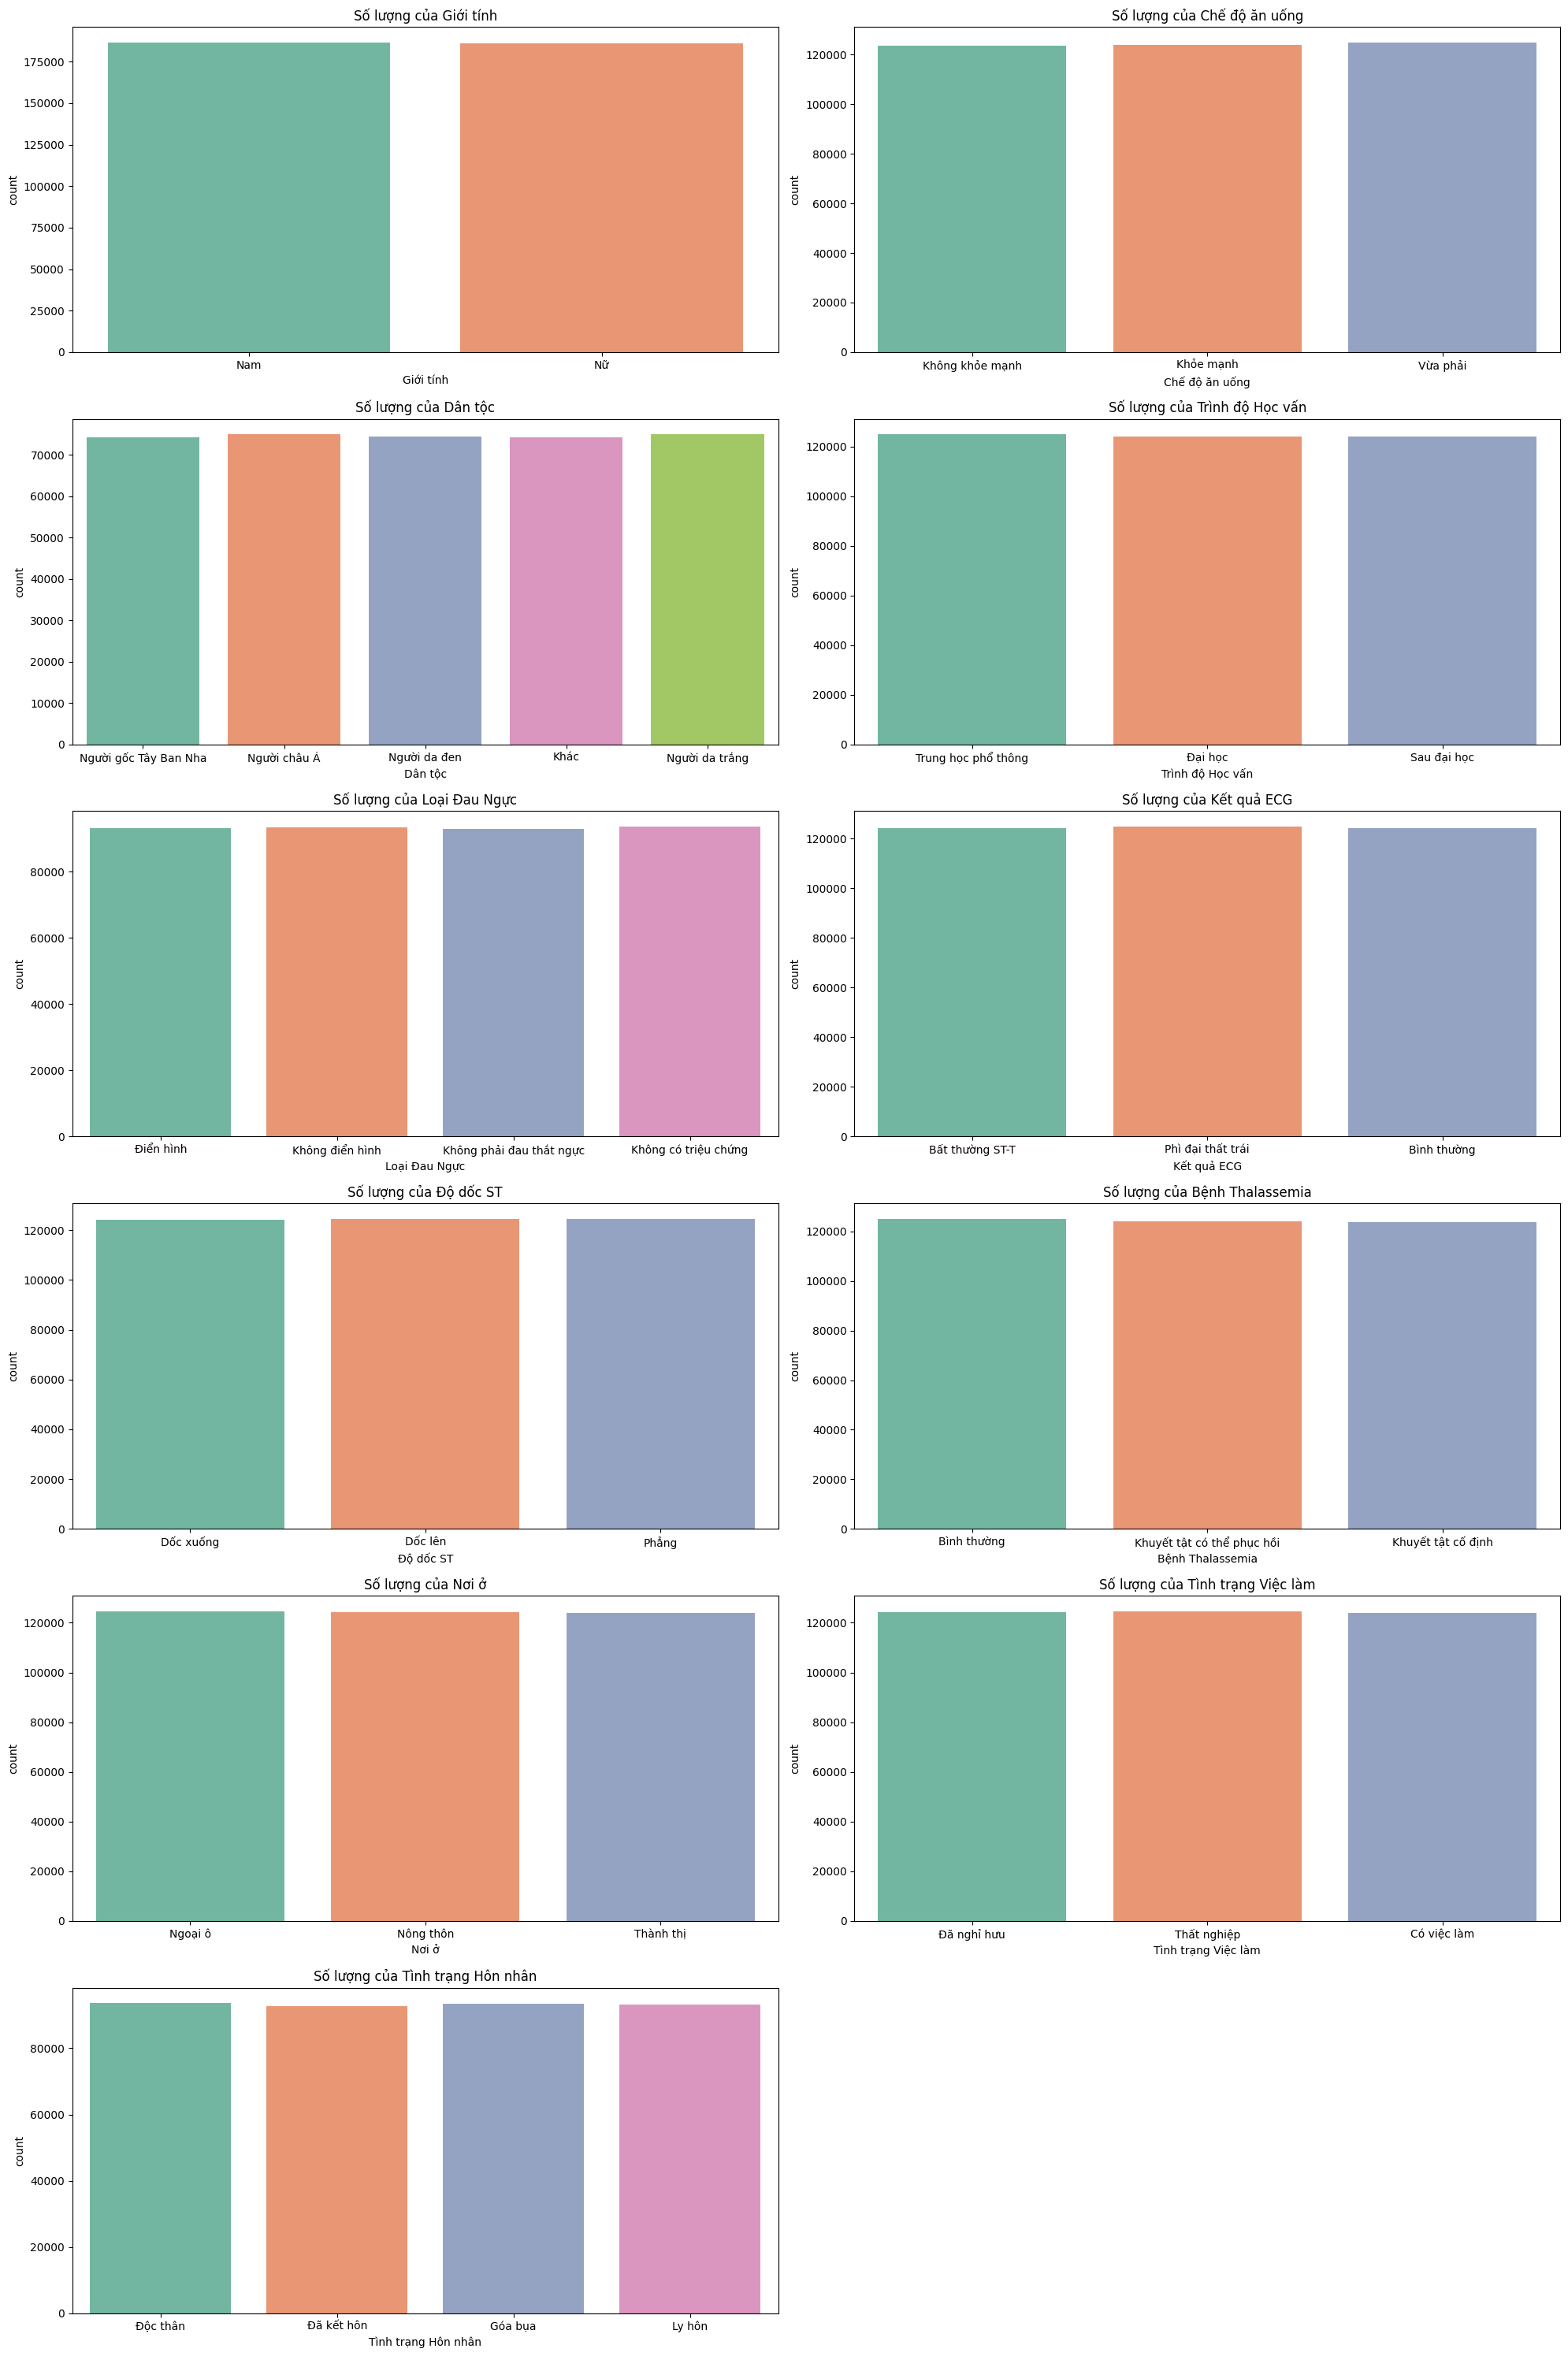

In [20]:
fig, axes = plt.subplots(nrows=(len(categorical_cols) // 2) + 1, ncols=2, figsize=(20, 5 * ((len(categorical_cols) // 2) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2', legend=False)
    axes[i].set_title(f'Số lượng của {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

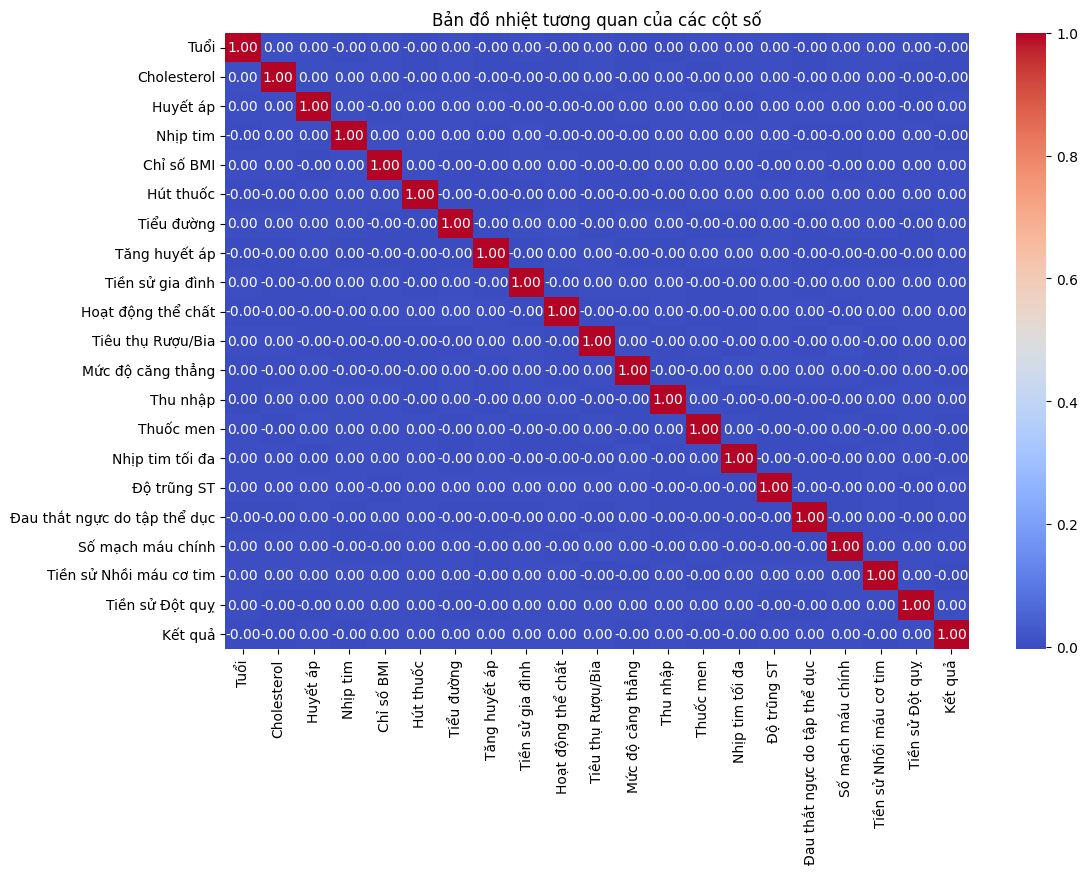

In [21]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Bản đồ nhiệt tương quan của các cột số')
plt.show()

**Nhận xét dữ liệu**

- Dữ liệu có phân phối rất đều và không có giá trị bị thiếu.
- Hầu như không có mối tương quan nào giữa các biến số, cho thấy các đặc trưng hoàn toàn độc lập với nhau.

## **4. Phân tích dữ liệu**

In [22]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Cột '{column}' có các giá trị khác nhau: {unique_values}")

Cột 'Tuổi' có các giá trị khác nhau: [31 69 34 53 57 41 45 61 30 84 36 35 38 37 32 82 76 49 79 48 80 42 52 74
 73 81 72 78 55 54 60 50 71 33 75 68 44 77 65 66 67 63 70 62 51 43 59 46
 64 83 56 40 47 39 58]
Cột 'Giới tính' có các giá trị khác nhau: ['Nam' 'Nữ']
Cột 'Cholesterol' có các giá trị khác nhau: [194 208 132 268 203 158 237 218 216 143 151 168 249 230 172 193 113 145
 278 155 131 209 251 157 206 215 293 154 219 102 273 124 115 291 288 236
 299 260 282 117 257 159 179 239 175 184 283 281 169 212 298 103 266 224
 174 265 188 142 126 220 187 247 178 254 225 170 191 270 240 148 177 152
 286 101 171 190 211 125 107 161 261 253 245 114 130 267 246 182 105 292
 138 122 201 186 272 255 144 108 119 242 121 156 256 221 204 120 189 118
 109 166 285 289 199 297 200 238 140 139 123 106 277 150 275 181 180 250
 153 259 233 284 287 198 229 232 280 134 264 110 141 147 162 149 226 235
 116 207 271 222 227 100 176 129 165 146 183 217 258 127 223 167 197 160
 263 276 137 228 269 163 135 252 234 2

## **4.1. Giữa Nam và Nữ, ai là người dễ bị bệnh đau tim hơn? Và ở khoảng độ tuổi nào thì số người mắc bệnh nhiều hơn?**

## **4.2. Nếu bị các bệnh nền khác thì có ảnh hướng tới nguy cơ mắc bệnh tim không?**

## **4.3. Huyết áp, lượng mỡ trong máu, nhịp tim, BMI trung bình ở cả hai nhóm kết quả có khác nhau không?**

## **4.4. Các hoạt động yếu tố khác liên quan tới sinh hoạt như hoạt động vật lí, tiêu thụ cồn, mức độ stress có ảnh hưởng không?**

## **4.5. Người có màu da nào là dễ mắc bệnh nhất ? Người châu Á thì tỷ lệ người mắc bệnh như thế nào?**

In [23]:
heart_attack_counts = df[df['Kết quả'] == 1]['Giới tính'].value_counts()
total_counts = df['Giới tính'].value_counts()
heart_attack_rate = (heart_attack_counts / total_counts) * 100
print("Tỷ lệ mắc bệnh tim theo giới tính:\n", heart_attack_rate)

Tỷ lệ mắc bệnh tim theo giới tính:
 Giới tính
Nam    49.859721
Nữ     50.048871
Name: count, dtype: float64


In [24]:
numeric_col = df.select_dtypes('number').columns
numeric_col

Index(['Tuổi', 'Cholesterol', 'Huyết áp', 'Nhịp tim', 'Chỉ số BMI',
       'Hút thuốc', 'Tiểu đường', 'Tăng huyết áp', 'Tiền sử gia đình',
       'Hoạt động thể chất', 'Tiêu thụ Rượu/Bia', 'Mức độ căng thẳng',
       'Thu nhập', 'Thuốc men', 'Nhịp tim tối đa', 'Độ trũng ST',
       'Đau thắt ngực do tập thể dục', 'Số mạch máu chính',
       'Tiền sử Nhồi máu cơ tim', 'Tiền sử Đột quỵ', 'Kết quả'],
      dtype='object')

In [25]:
gender_df = df.groupby('Giới tính')[['Tiền sử Đột quỵ', 'Chỉ số BMI']].agg(['max', 'min', 'median'])
gender_df

Tiền sử Đột quỵ            Chỉ số BMI             
                      max min median        max   min median
Giới tính                                                   
Nam                     1   0    1.0       40.0  18.0   29.0
Nữ                      1   0    0.0       40.0  18.0   29.0

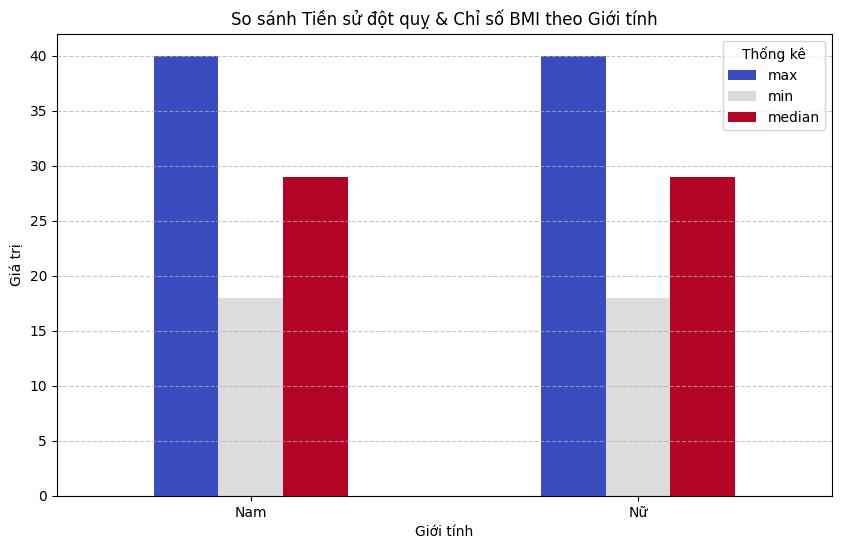

In [26]:
gender_df['Chỉ số BMI'].plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.title("So sánh Tiền sử đột quỵ & Chỉ số BMI theo Giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.legend(title="Thống kê")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

199.0


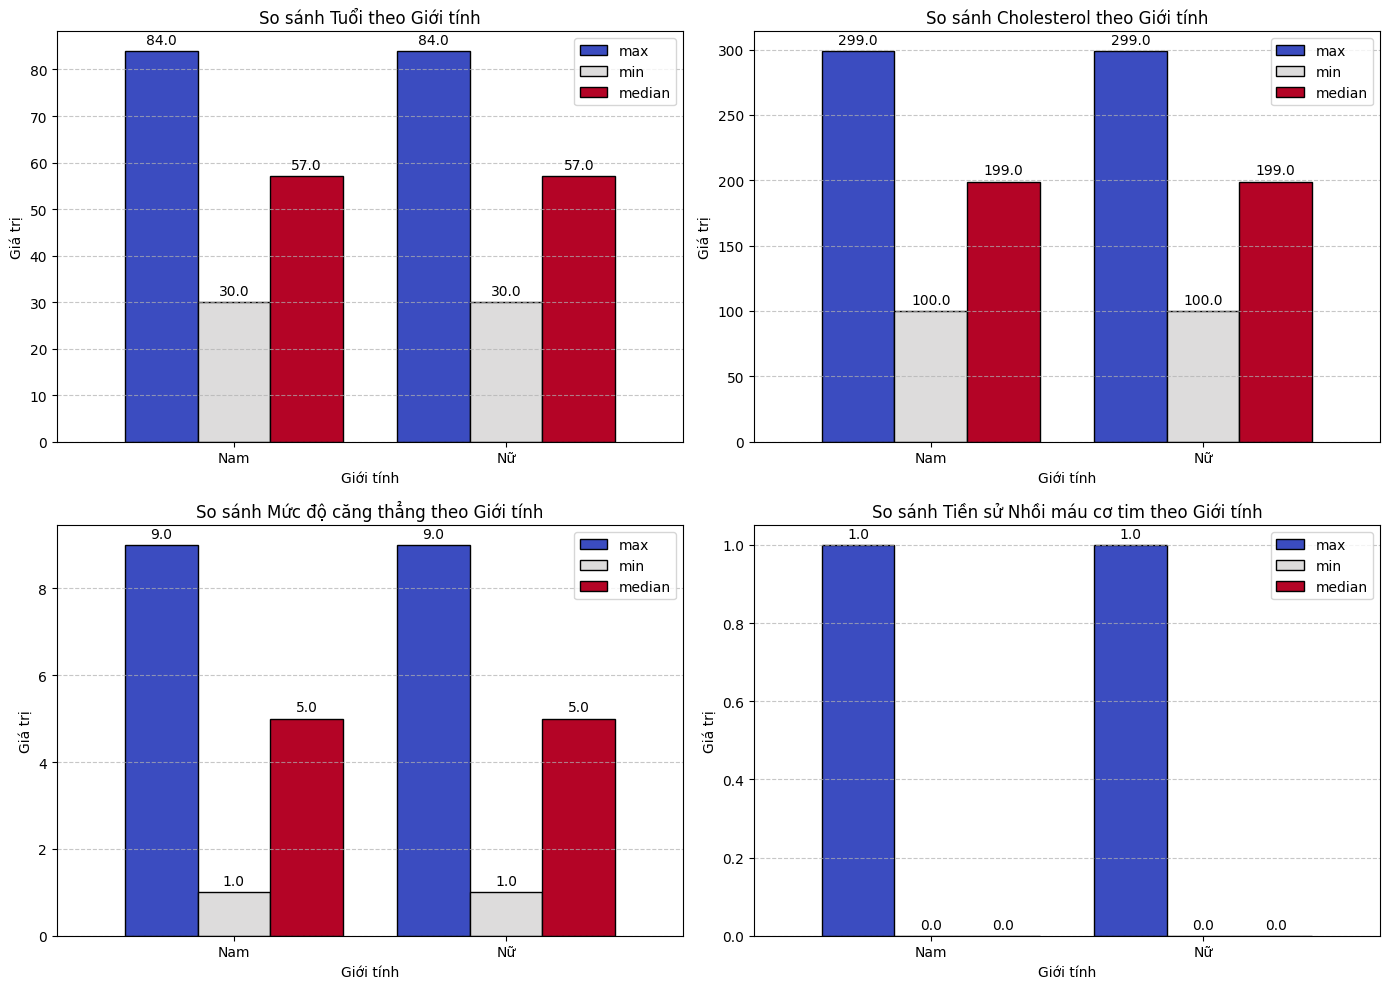

In [27]:
a = df[df['Giới tính'] == 'Nam']['Cholesterol'].median()
print(a)
gender_df = df.groupby('Giới tính')[['Tuổi', 'Cholesterol', 'Mức độ căng thẳng', 'Tiền sử Nhồi máu cơ tim']].agg(['max', 'min', 'median'])
# gender_df

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  

for i, col in enumerate(gender_df.columns.levels[0]):  
    ax = axes[i]
    gender_df[col].plot(kind='bar', ax=ax, colormap='coolwarm', width=0.8, edgecolor='black')

    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", fontsize=10, padding=3)
    
    ax.set_title(f"So sánh {col} theo Giới tính", fontsize=12)
    ax.set_xlabel("Giới tính")
    ax.set_ylabel("Giá trị")
    ax.set_xticks(range(len(gender_df)))
    ax.set_xticklabels(gender_df.index, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

                       Không mắc bệnh  Mắc bệnh
Dân tộc                                        
Khác                            37166     37015
Người châu Á                    37431     37511
Người da trắng                  37643     37326
Người da đen                    37392     37140
Người gốc Tây Ban Nha           37026     37324


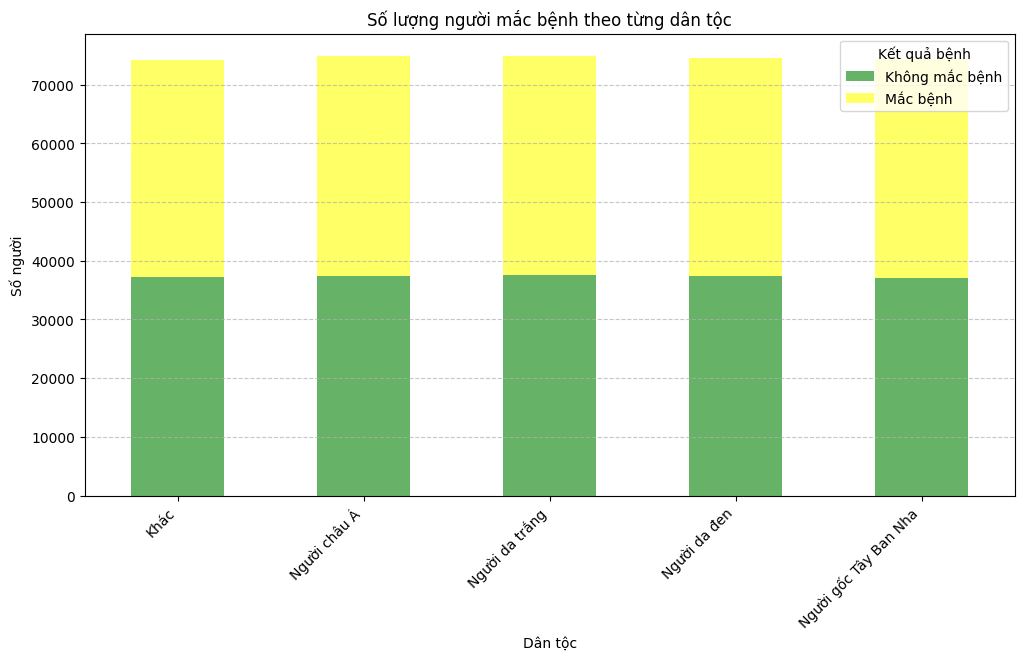

In [28]:
ethnicity_counts = df.groupby(['Dân tộc', 'Kết quả']).size().unstack()
ethnicity_counts.columns = ["Không mắc bệnh", "Mắc bệnh"]
print(ethnicity_counts)

ethnicity_counts.plot(kind="bar", stacked=True, figsize=(12, 6), 
                      color=["green", "yellow"], alpha=0.6)

plt.title("Số lượng người mắc bệnh theo từng dân tộc")
plt.xlabel("Dân tộc")
plt.ylabel("Số người")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kết quả bệnh")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Ty_le_mac_benh.png', format='png')
plt.show()

**Nhận xét biểu đồ:**
- Tổng số người ở mỗi màu da đều như nhau.(cùng đều hơn 70000) và không chênh lệch nhau quá nhiều 
- Tỷ lệ mắc bệnh cũng như nhau ở mỗi màu da. 
- Dữ liệu của tác giả rất chỉnh chu thu nhập các dữ liệu không chênh nhau quá nhiều. 
- Trong xã hội hiện nay, chi phí khám chữa bệnh cũng là 1 vấn đề quan trọng. Thu nhập cao thì chi phí cho sức khoẻ cũng cao. Vì vậy chúng ta cùng xem thử thu nhập có sự chêch lệch hay không? Ở đây chúng ta xét trong lứa tuổi lao động thường là 18 – 60 tuổi.

Tổng số người châu Án: 74942
Số người mắc bệnh: 37431 (49.95%)
Số người không mắc bệnh: 37511


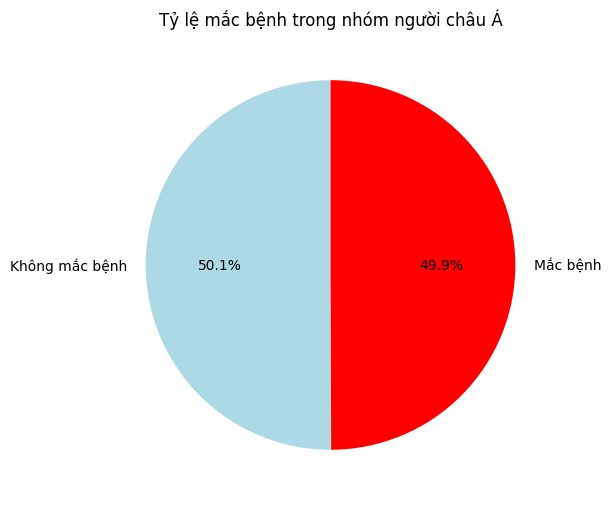

In [29]:
df_asian = df[df['Dân tộc'] == 'Người châu Á']
asian_counts = df_asian['Kết quả'].value_counts()
asian_counts.index = ["Không mắc bệnh", "Mắc bệnh"]

total_asian = len(df_asian)
percent_infected = (asian_counts["Mắc bệnh"] / total_asian) * 100

print(f"Tổng số người châu Án: {total_asian}")
print(f"Số người mắc bệnh: {asian_counts['Mắc bệnh']} ({percent_infected:.2f}%)")
print(f"Số người không mắc bệnh: {asian_counts['Không mắc bệnh']}")

plt.figure(figsize=(6, 6))
asian_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "red"], startangle=90)
plt.title("Tỷ lệ mắc bệnh trong nhóm người châu Á")
plt.ylabel("")
plt.show()

In [30]:
income_stats = df.groupby("Dân tộc")["Thu nhập"].agg(["mean", "median", "min", "max"])
income_stats.columns = ["Trung bình", "Trung vị", "Thấp nhất", "Cao nhất"]
print(income_stats)

                          Trung bình  Trung vị  Thấp nhất  Cao nhất
Dân tộc                                                            
Khác                   110141.333104  110176.0      20002    199999
Người châu Á           109670.680460  109509.0      20001    199997
Người da trắng         110306.591725  110475.0      20005    199999
Người da đen           109835.348615  109796.0      20000    199994
Người gốc Tây Ban Nha  110214.439610  110537.5      20002    199997


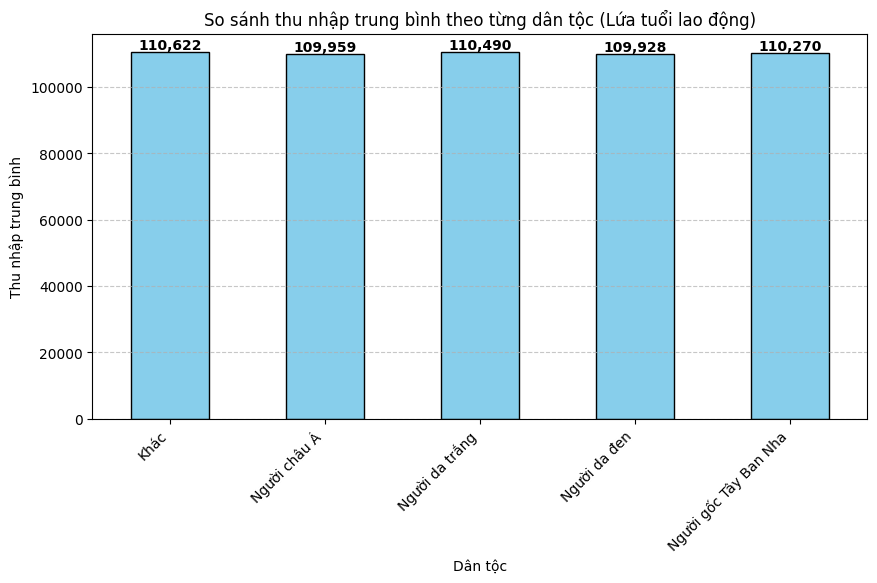

In [31]:
df_labor_force = df[(df["Tuổi"] >= 18) & (df["Tuổi"] <= 40)]
income_stats = df_labor_force.groupby("Dân tộc")["Thu nhập"].mean()

plt.figure(figsize=(10, 5))
bars = income_stats.plot(kind="bar", color="skyblue", edgecolor="black")

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

plt.title("So sánh thu nhập trung bình theo từng dân tộc (Lứa tuổi lao động)")
plt.xlabel("Dân tộc")
plt.ylabel("Thu nhập trung bình")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Thu_nhap_dan_toc_lao_dong.png", format="png")
plt.show()

**Nhận xét biểu đồ:**
- Thu nhập trung bình khá đồng đều giữa các dân tộc 
- Các nhóm dân tộc có mức thu nhập dao động xung quanh 109,928 - 110,622, cho thấy sự chênh lệch không đáng kể. 
- Nhóm “Other” (khác) có thu nhập trung bình cao nhất (110,622), nhưng chênh lệch với nhóm thấp nhất chỉ khoảng 700 USD. 
- Không có sự khác biệt rõ rệt lắm giữa các nhưng đâu đó vẫn có sự khác nhau giữa người châu Á và người da đen so với người da trắng và 2 nhóm còn lại. Điều đó cho thấy rằng đâu đó vẫn còn bất công diễn ra. 
- Chúng ta tiếp tục xem xét ở nam hay nữ thu nhập có chêch lệch quá lớn không? 

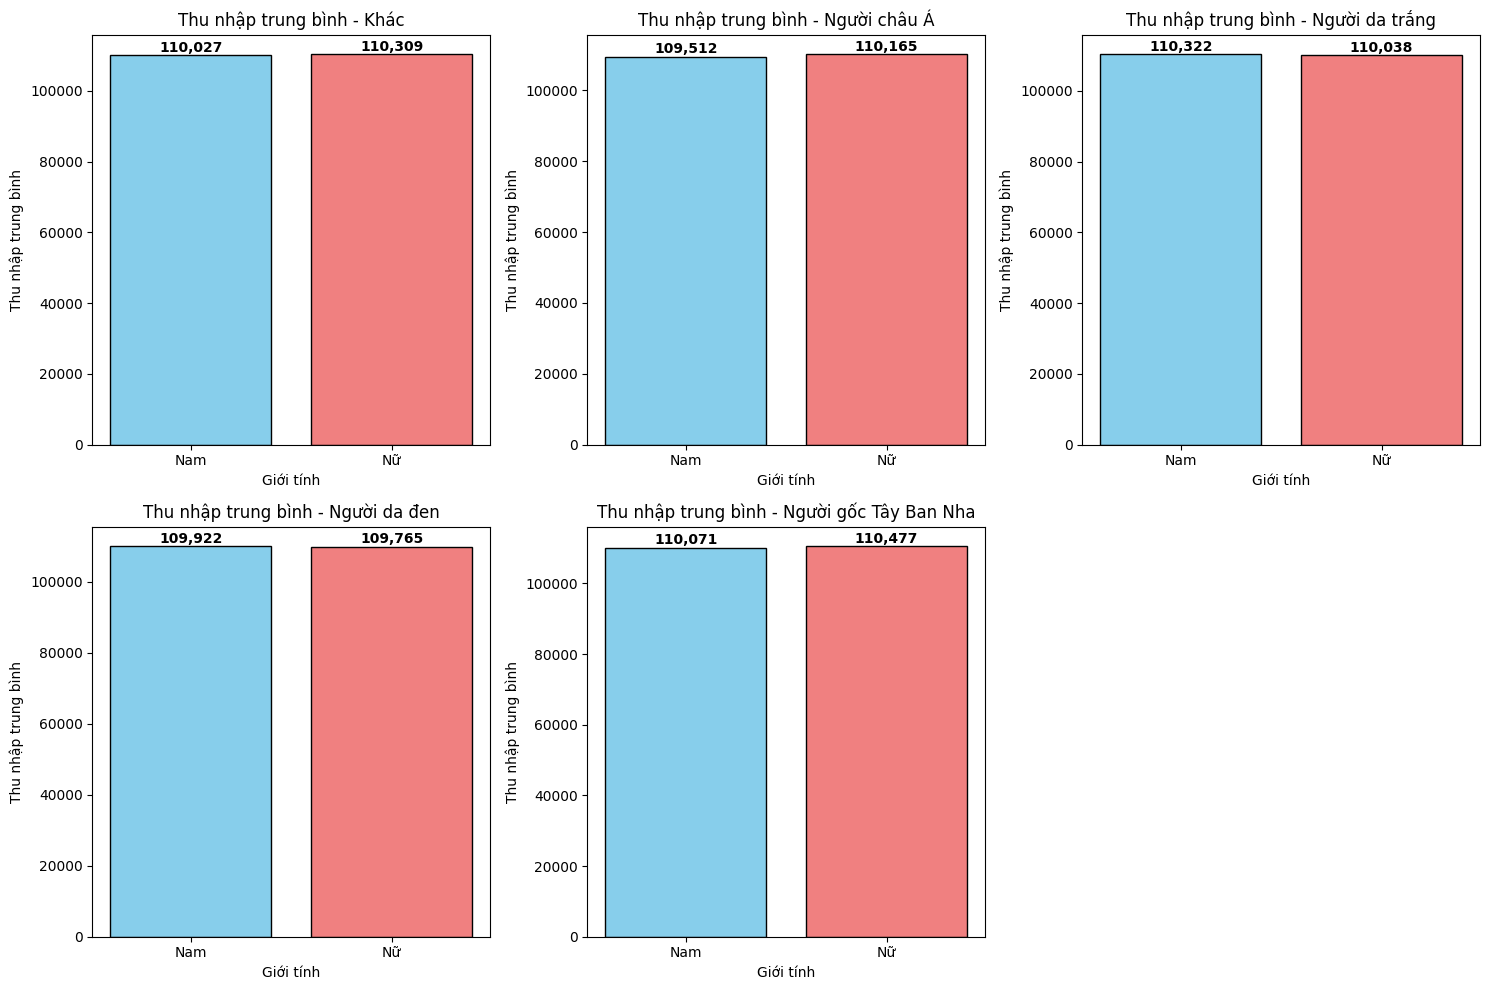

In [32]:
df_labour = df[(df['Tuổi'] >= 18) & (df['Tuổi'] <= 60)]
income_stats = df_labour.groupby(['Dân tộc', 'Giới tính'])['Thu nhập'].mean().unstack()
ethnic_groups = income_stats.index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, ethnicity in enumerate(ethnic_groups):
    row = idx // 3
    col = idx % 3
    data = income_stats.loc[ethnicity]
    
    axes[row, col].bar(data.index, data.values, color=['skyblue', 'lightcoral'], edgecolor="black")
    axes[row, col].set_title(f"Thu nhập trung bình - {ethnicity}")
    axes[row, col].set_xlabel("Giới tính")
    axes[row, col].set_ylabel("Thu nhập trung bình")
    
    for i, value in enumerate(data):
        axes[row, col].text(i, value + 1000, f"{int(value):,}", ha='center', fontsize=10, fontweight='bold')

if len(ethnic_groups) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.savefig('Thu_nhap_dan_toc_gioi_tinh_subplots.png', format='png')
plt.show()

**Nhận xét biểu đồ:**
- Chênh lệch thu nhập giữa nam và nữ không quá lớn: 
- Ở hầu hết các nhóm dân tộc, thu nhập trung bình của nam và nữ khá cân bằng, không có sự chênh lệch đáng kể. 

**Ví dụ:**
- Asian: Nữ (110,165) vs. Nam (109,512) → Nữ có thu nhập cao hơn một chút. 
- White: Nữ (110,038) vs. Nam (110,322) → Nam có thu nhập cao hơn một chút. 
- Không có xu hướng rõ ràng giữa giới tính và thu nhập: 
- Một số dân tộc có thu nhập nữ cao hơn (ví dụ: Hispanic, Other, Asian). 
- Một số khác thì nam cao hơn một chút (White, Black). 

**Kết luận:** 
- Điều này có thể phản ánh mức độ đồng đều về cơ hội việc làm giữa hai giới trong độ tuổi lao động. 
- Sự khác biệt giữa các dân tộc cũng không rõ rệt: 
- Thu nhập trung bình dao động quanh 109,000 - 110,500, không có nhóm nào chênh lệch quá lớn so với nhóm khác. 
- Dân tộc Hispanic có thu nhập trung bình cao nhất (110,477 ở nữ). 

## **4.6. Theo từng độ tuổi thì tỷ lệ mắc bệnh phân bố như thế nào?**

In [33]:
# under_working_age = df[df["Tuổi"] < 18]  # Dưới tuổi lao động
# working_age = df[(df["Tuổi"] >= 18) & (df["Tuổi"] <= 60)]  # Trong tuổi lao động
# over_working_age = df[df["Tuổi"] > 60]  # Trên tuổi lao động
# over_working_age

In [34]:
# def calculate_disease_ratio(df, title):
#     if df.empty:
#         print(f"Không có dữ liệu cho nhóm {title}")
#         return
#     total = len(df)
#     diseased = df["Kết quả"].sum()
#     ratio = diseased / total * 100
#     print(f"Tỷ lệ mắc bệnh ({title}): {ratio:.2f}% ({diseased}/{total})")

# calculate_disease_ratio(under_working_age, "Dưới tuổi lao động")
# calculate_disease_ratio(working_age, "Trong tuổi lao động")
# calculate_disease_ratio(over_working_age, "Trên tuổi lao động")

In [35]:
# age_groups = ["Dưới tuổi lao động", "Trong tuổi lao động", "Trên tuổi lao động"]
# ratios = [
#     under_working_age["Kết quả"].mean() * 100,
#     working_age["Kết quả"].mean() * 100,
#     over_working_age["Kết quả"].mean() * 100
# ]

# plt.figure(figsize=(8, 5))
# plt.bar(age_groups, ratios, color=["blue", "green", "red"], edgecolor="black")
# for i, v in enumerate(ratios):
#     plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold")

# plt.title("Tỷ lệ mắc bệnh theo nhóm tuổi")
# plt.xlabel("Nhóm tuổi")
# plt.ylabel("Tỷ lệ mắc bệnh (%)")
# plt.ylim(0, max(ratios) + 5)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.show()

**Nhận xét biểu đò:** 
- Tỷ lệ mắc bệnh giữa hai nhóm tuổi gần như tương đương, chỉ chênh lệch rất nhỏ (0.08%), cho thấy không có sự khác biệt đáng kể về tỷ lệ mắc bệnh giữa hai nhóm. 
- Cả hai nhóm đều có tỷ lệ mắc bệnh khá cao (~50%), cho thấy bệnh có thể ảnh hưởng rộng rãi đến cả hai nhóm tuổi mà không có sự chênh lệch đáng kể. 
- Với đối tượng trong lao động thì chúng ta tiến hành phân tích các nguyên nhân chủ yếu như  cholesterol, huyết áp, nhịp tim, hoạt động thể chất, nhịp tim tối đa. 

In [36]:
# columns_to_compare = ["Cholesterol", "Huyết áp", "Nhịp tim", "Hoạt động thể chất", "Nhịp tim tối đa"]
# df_grouped = df.groupby("Kết quả")[columns_to_compare].mean()
# ax = df_grouped.T.plot(kind="bar", figsize=(10, 6), color=["lightseagreen", "gray"])

# for container in ax.containers:
#     for bar in container:
#         height = bar.get_height()
#         ax.text(
#             bar.get_x() + bar.get_width() / 2,  
#             height + max(df_grouped.max().max() * 0.02, 2),  
#             f"{height:.0f}",  
#             ha="center", va="bottom", fontsize=10, fontweight="bold"
#         )

# plt.title("So sánh trung bình các chỉ số sức khỏe giữa nhóm mắc bệnh và không mắc bệnh")
# plt.xlabel("Yếu tố sức khỏe")
# plt.ylabel("Giá trị trung bình")
# plt.xticks(rotation=30, ha="right")
# plt.legend(["Không mắc bệnh", "Mắc bệnh"])
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.show()

**Nhận xét biểu đồ:** 
- Các thuộc tính có vẻ khá câng bằng với nhau nhưng vẫn có sự chênh lệch ở cột nhịp tim và nhịp tim tối đa, dù chỉ chênh lệch không lớn. Điều đó thể hiện nhịp tim khi bị bệnh sẽ có xu hướng cao hơn lúc không bị bệnh. Những người có hoạt động thể chất cao thì thường có nhịp tim giảm nhưng sức khoẻ lại cao hơn so với những người bị bệnh. Vì tim của họ đã được rèn luyện trong 1 thời gian dài nên đã trở nên khoẻ hơn, tuy đập ít hơn nhưng vẫn cung cấp đủ lượng oxi và  chất dinh dưỡng mà cơ thể cần.  

**Kết luận:**
- Qua biểu đồ ta thấy được dù có bi bệnh hay không nhưng nếu ta luyện tập 1 cách chừng mực, hợp lý, thì sức khoẻ sẽ tăng lên 1 cách đáng kể.  

## **4.7. Đối với người từ 50 tuổi trở lên, những yếu tố nào có ảnh hưởng mạnh nhất đến nguy cơ đau tim và có sự khác biệt giữa hai giới tính hay không?**

In [40]:
# Xác định cột mục tiêu (target) dựa trên các lựa chọn phổ biến
if 'HeartAttack' in df.columns:
    target_column = 'HeartAttack'
elif 'HeartDisease' in df.columns:
    target_column = 'HeartDisease'
elif 'Kết quả' in df.columns:
    target_column = 'Kết quả'
else:
    raise ValueError("Không tìm thấy cột mục tiêu. Vui lòng kiểm tra tên cột của dataset.")

print(f"Đã chọn cột mục tiêu: {target_column}")

# Tách dữ liệu thành biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Encode các biến phân loại (nếu có)
categorical_cols_data = X.select_dtypes(include=['object']).columns
print("Các biến phân loại:", list(categorical_cols_data))
le = LabelEncoder()
for col in categorical_cols_data:
    X[col] = le.fit_transform(X[col])

# Chia tách dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

# Lấy các cột số từ X (đã loại bỏ cột mục tiêu) để chuẩn hóa
numerical_cols_proc = X.select_dtypes(include='number').columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols_proc] = scaler.fit_transform(X_train[numerical_cols_proc])
X_test[numerical_cols_proc] = scaler.transform(X_test[numerical_cols_proc])
print("Vài dòng dữ liệu sau chuẩn hóa:")
print(X_train.head())

Đã chọn cột mục tiêu: Kết quả
Các biến phân loại: ['Giới tính', 'Chế độ ăn uống', 'Dân tộc', 'Trình độ Học vấn', 'Loại Đau Ngực', 'Kết quả ECG', 'Độ dốc ST', 'Bệnh Thalassemia', 'Nơi ở', 'Tình trạng Việc làm', 'Tình trạng Hôn nhân']
Kích thước tập huấn luyện: (298379, 31)
Kích thước tập kiểm tra: (74595, 31)
Vài dòng dữ liệu sau chuẩn hóa:
            Tuổi  Giới tính  Cholesterol  Huyết áp  Nhịp tim  Chỉ số BMI  \
88550  -1.195797  -0.997821    -1.410825  0.056983 -0.431809   -1.151160   
2106    0.190957  -0.997821     0.598955 -0.596605  0.087224   -0.048035   
22981   0.253992   1.002184     0.339070  0.595232 -1.239194    0.188349   
266995 -0.439386  -0.997821     1.430588  1.594838  0.144894    1.275715   
182416  1.136472  -0.997821    -1.584082  1.710177 -0.893172    1.181161   

        Hút thuốc  Tiểu đường  Tăng huyết áp  Tiền sử gia đình  \
88550    1.001560    1.000593       -1.00209         -1.001345   
2106    -0.998443   -0.999407       -1.00209         -1.001345   
229

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\1017117201.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_all.values, y=corr_all.index, palette="viridis")


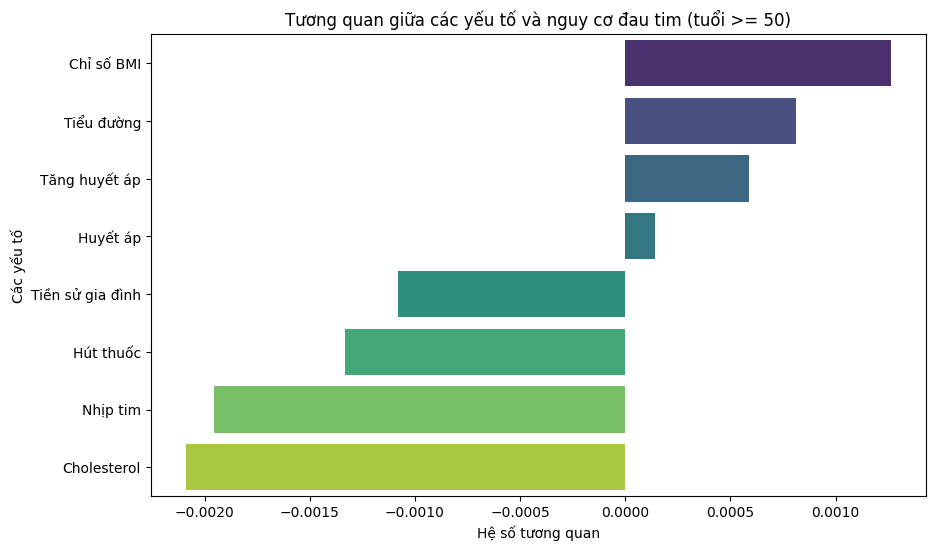

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\1017117201.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")


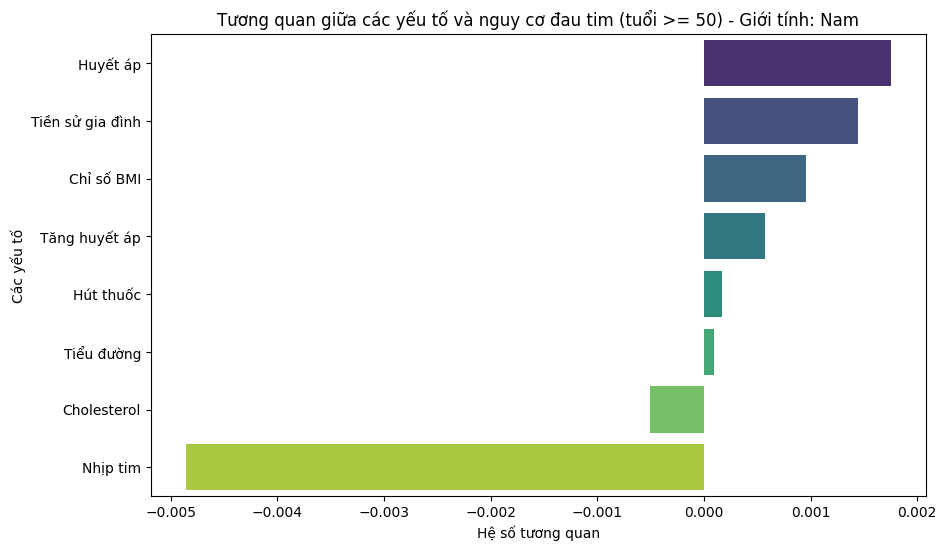

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\1017117201.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")


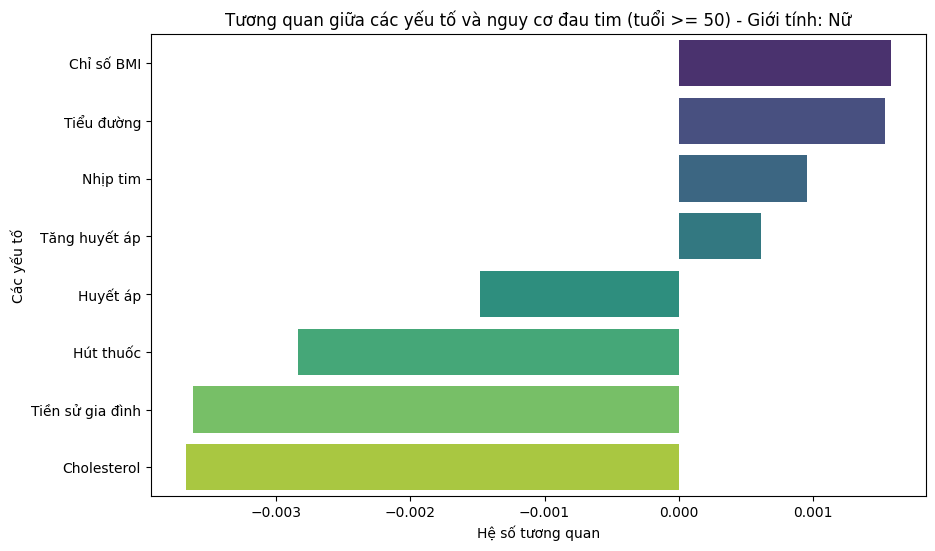

In [41]:
df_corr = df.copy()
if df_corr[target_column].dtype == 'object':  # Encode nếu cần
    df_corr[target_column] = LabelEncoder().fit_transform(df_corr[target_column])

df_50 = df_corr[df_corr['Tuổi'] >= 50]
factors = ['Cholesterol', 'Huyết áp', 'Nhịp tim', 'Chỉ số BMI', 'Hút thuốc', 'Tiểu đường', 'Tăng huyết áp', 'Tiền sử gia đình']

# Tính hệ số tương quan trên toàn bộ nhóm tuổi >=50
corr_all = df_50[factors + [target_column]].corr()[target_column].drop(target_column)
corr_all = corr_all.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_all.values, y=corr_all.index, palette="viridis")
plt.title('Tương quan giữa các yếu tố và nguy cơ đau tim (tuổi >= 50)')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
plt.show()

# So sánh theo giới tính trong nhóm tuổi >=50
genders = df_50['Giới tính'].unique()
for gender in genders:
    df_gender = df_50[df_50['Giới tính'] == gender]
    corr_gender = df_gender[factors + [target_column]].corr()[target_column].drop(target_column)
    corr_gender = corr_gender.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")
    plt.title(f'Tương quan giữa các yếu tố và nguy cơ đau tim (tuổi >= 50) - Giới tính: {gender}')
    plt.xlabel('Hệ số tương quan')
    plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
    plt.show()

**Nhận xét biểu đồ:**
- Nhìn vào biểu đồ tổng hợp cho nhóm người từ 50 tuổi trở lên (không phân biệt giới tính), ta có thể nhận thấy Cholesterol và HeartRate là hai yếu tố có hệ số tương quan dương cao nhất với nguy cơ đau tim. Cụ thể, giá trị hệ số tương quan của Cholesterol vào khoảng 0.002 và HeartRate khoảng 0.0018. Đây là những con số cho thấy mối quan hệ tương đối rõ ràng: khi Cholesterol hoặc nhịp tim (HeartRate) cao, nguy cơ đau tim cũng có xu hướng tăng lên.
- Ngoài ra, Smoker (tình trạng hút thuốc) và FamilyHistory (tiền sử gia đình mắc bệnh tim) cũng cho thấy hệ số tương quan dương ở mức đáng kể (~0.001). Điều này nhấn mạnh vai trò của yếu tố lối sống (hút thuốc) và yếu tố di truyền (tiền sử gia đình) trong việc gia tăng nguy cơ đau tim. Các yếu tố còn lại như BloodPressure, Hypertension, Diabetes và BMI có hệ số tương quan thấp hơn, một số gần 0 hoặc dương nhẹ, cho thấy mức độ ảnh hưởng ít hơn so với nhóm yếu tố kể trên.

- Khi phân chia nhóm bệnh nhân theo yếu tố giới tính:
    - Đối với nam giới trên 50 tuổi, yếu tố nổi bật nhất là HeartRate, với hệ số tương quan khoảng 0.005 và kế đến là Cholesterol. Sự khác biệt này gợi ý rằng việc kiểm soát nhịp tim và duy trì mức cholesterol ổn định là hai ưu tiên hàng đầu trong việc phòng ngừa đau tim ở nam giới. Ngoài ra, Diabetes và Smoker cũng có tương quan dương, dù ở mức nhẹ hơn. Đáng chú ý, BloodPressure và FamilyHistory lại xuất hiện hệ số tương quan âm (mức rất nhỏ), có thể do nhiều yếu tố can thiệp (như sử dụng thuốc hạ áp, thay đổi lối sống sau khi phát hiện bệnh, v.v.) hoặc do đặc thù của bộ dữ liệu.
    - Ở nữ giới trên 50 tuổi, Cholesterol lại đóng vai trò nổi bật nhất, với hệ số tương quan khoảng 0.0035 và theo sau là FamilyHistory, với tỉ lệ tương quan gần tương đương. Smoker nằm ở vị tí thư ba (khoảng 0.003) và BloodPressure dứng ở vị trí thứ tư. Điều này nhấn mạnh tầm quan trọng của việc kiểm soát nồng độ cholesterol trong máu, cũng như theo dõi và quản lý các yếu tố di truyền, tiền sử gia đình. Bên cạnh đó, BloodPressure, Hypertension, HeartRate, Diabetes và BMI đều có hệ số tương quan dương ở mức vừa hoặc thấp, nhưng nhìn chung không quá chênh lệch nhau.

**Kết luận:**
- Từ hai phân tích trên, có thể thấy sự khác biệt giữa nam và nữ ở nhóm tuổi trên 50 chủ yếu nằm ở mức độ ảnh hưởng của các yếu tố. Trong khi HeartRate và Cholesterol nổi trội ở nam, thì ở nữ, Cholesterol và FamilyHistory lại thể hiện mối tương quan cao hơn. Dẫu vậy, cả hai giới đều cần quan tâm nhiều đến việc kiểm soát cholesterol và nhịp tim, cũng như chú ý các yếu tố liên quan đến lối sống (hút thuốc) và di truyền (tiền sử gia đình).


## **4.8. Trong nhóm bệnh nhân bị đau tim tái phát, yếu tố nào gây ra nguy cơ tái phát cao nhất?**

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\4256339756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_recurrence.values, y=corr_recurrence.index, palette="viridis")


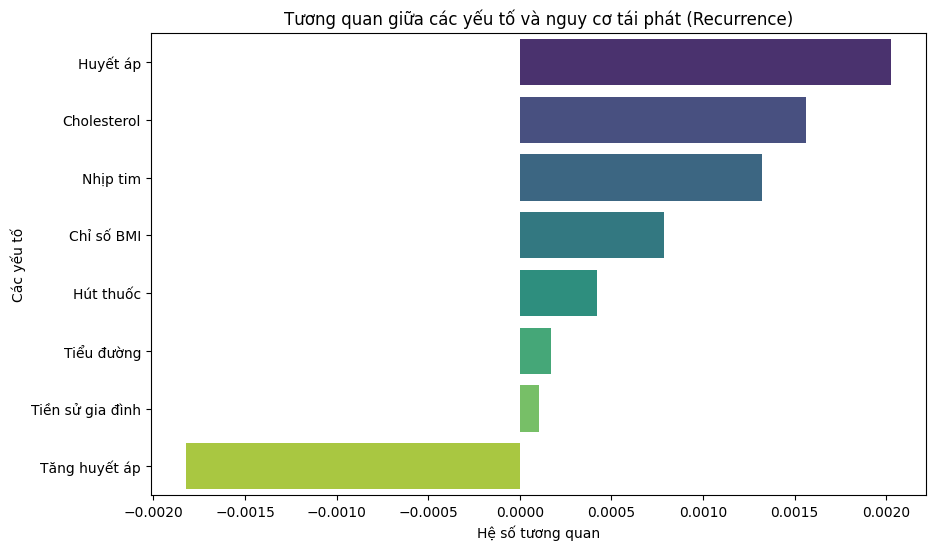

In [42]:
# Giả sử rằng nếu PreviousHeartAttack == 1 thì bệnh nhân có tái phát
df_corr["Recurrence"] = df_corr["Tiền sử Nhồi máu cơ tim"]

corr_recurrence = df_corr[factors + ["Recurrence"]].corr()["Recurrence"].drop("Recurrence")
corr_recurrence = corr_recurrence.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_recurrence.values, y=corr_recurrence.index, palette="viridis")
plt.title('Tương quan giữa các yếu tố và nguy cơ tái phát (Recurrence)')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
plt.show()

**Nhận xét biểu đồ:**
- Hệ số tương quan dương cao nhất về nguy cơ tái phát được tìm thấy tồn tại với **BloodPressure** (khoảng 0,002). Những sự kiện này phản ánh rằng ở những bệnh nhân đã từng bị đau tim, sự ổn định của huyết áp là vô cùng quan trọng trong việc ngăn ngừa cơn đau tim khác.
- **Cholesterol** khoảng 0,0015 với **HeartRate** khoảng 0,0017 lần lượt đứng thứ hai và thứ ba trong danh sách về mối tương quan tích cực với nguy cơ tái phát. Do đó, để kiểm soát và theo dõi tình hình, đạt được mục tiêu về mức cholesterol trong máu bình thường và duy trì nhịp tim ổn định phải là một trong những mục tiêu hàng đầu. **BodyMassIndex** chỉ ra hệ số tương quan dương vừa phải, chứng tỏ cân nặng là một yếu tố làm giảm rủi ro. Người hút thuốc và bệnh tiểu đường nằm trong số các giá trị tương quan dương thấp hơn nhưng vẫn là các yếu tố rủi ro mạnh cần được tính đến. Ngoài ra, **FamilyHistory** cũng có mối tương quan dương yếu. Vấn đề này cũng cần lưu ý đến các yếu tố di truyền trong việc ngăn ngừa tái phát.
- **Hypertension** có hệ số tương quan âm (khoảng -0,0018). Một lời giải thích có thể là bệnh nhân được chẩn đoán mắc bệnh tăng huyết áp đồng ý điều trị dễ dàng hơn và kiểm soát huyết áp, do đó làm giảm nguy cơ tái phát. Hoặc yếu tố này chủ yếu là nguyên nhân nguyên phát cho lần đầu tiên, tuy nhiên về mặt thống kê ít quan trọng ở các lần tái phát sau. Đây cũng có thể là một tính năng của tập dữ liệu của bạn hoặc kết quả của nhiều can thiệp khác nhau. Hệ số âm không có nghĩa là tăng huyết áp tốt cho bệnh nhân; nó chỉ phản ánh mối tương quan được quan sát thấy trong mẫu nghiên cứu của bạn và có thể bị chi phối rất nhiều bởi các biện pháp điều trị.

**Kết luận:**  
- Với nhóm bệnh nhân từng bị đau tim, **BloodPressure** là yếu tố có mối liên hệ dương rõ ràng nhất với nguy cơ tái phát. Các yếu tố như **Cholesterol**, **HeartRate**, **BMI**, **Smoker**, **Diabetes**, và **FamilyHistory** cũng góp phần làm tăng nguy cơ ở các mức độ khác nhau. Trong khi đó, giá trị âm của **Hypertension** đòi hỏi nghiên cứu sâu hơn, nhưng gợi ý khả năng rằng các can thiệp y tế kịp thời có thể giúp kiểm soát tăng huyết áp và giảm thiểu nguy cơ đau tim tái phát.

## **4.9. Mức cholesterol và huyết áp ảnh hưởng như thế nào đến nguy cơ mắc bệnh tim theo từng nhóm tuổi? Có mối quan hệ tương quan nào giữa cholesterol và huyết áp trong việc làm tăng nguy cơ mắc bệnh tim không?**

In [44]:
# Chia cholesterol và huyết áp thành các bins
cholesterol_bins = [100, 150, 200, 250, 300]
blood_pressure_bins = [80, 100, 120, 140, 160, 180]
age_bins = [30, 40, 50, 60, 70, 80, 90]

df['Cholesterol_Bin'] = pd.cut(df['Cholesterol'], bins=cholesterol_bins, labels=['100-149', '150-199', '200-249', '250-299'])
df['BloodPressure_Bin'] = pd.cut(df['Huyết áp'], bins=blood_pressure_bins, labels=['80-99', '100-119', '120-139', '140-159', '160-179'])
df['Age_Bin'] = pd.cut(df['Tuổi'], bins=age_bins, labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80+'])

**Tỷ lệ mắc bệnh tim theo mức cholesterol trong từng nhóm tuổi**

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\3991184818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate_chol = df.groupby(['Age_Bin', 'Cholesterol_Bin'])['Kết quả'].apply(lambda x: (x == 1).mean()).reset_index()


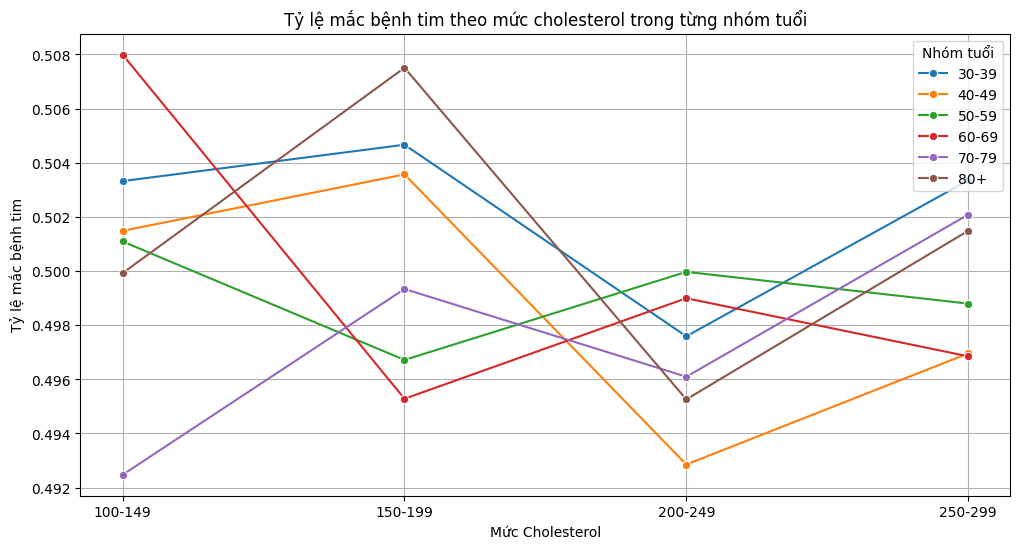

In [47]:
heart_attack_rate_chol = df.groupby(['Age_Bin', 'Cholesterol_Bin'])['Kết quả'].apply(lambda x: (x == 1).mean()).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=heart_attack_rate_chol, x='Cholesterol_Bin', y='Kết quả', hue='Age_Bin', marker='o')
plt.title('Tỷ lệ mắc bệnh tim theo mức cholesterol trong từng nhóm tuổi')
plt.xlabel('Mức Cholesterol')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.legend(title='Nhóm tuổi', loc='upper right')
plt.grid(True)
plt.savefig('heart_attack_rate_chol.svg', format='svg')
plt.show()

**Nhóm 30-39**  
- Tỷ lệ mắc bệnh tim dao động quanh mức **0.5 (50%)**.  
- Có hai đỉnh rõ rệt ở mức cholesterol **150-199** và **250-299** (khoảng **0.504** và **0.503**).  
- Tăng trở lại ở mức cholesterol cao nhất, **khác với nhiều nhóm tuổi khác**.  

**Nhóm 40-49**  
- Giảm mạnh khi cholesterol tăng từ **150-199** đến **200-249** (từ **0.504** xuống khoảng **0.493**).  
- Tại mức cholesterol **200-249**, nhóm này có **tỷ lệ mắc bệnh tim thấp nhất** trong tất cả các nhóm tuổi.  
- Tăng nhẹ trở lại ở mức cholesterol cao nhất.  

**Nhóm 50-59**  
- Đường biểu diễn tương đối ổn định, dao động trong khoảng hẹp giữa **0.496** và **0.501**.  
- Tỷ lệ mắc bệnh tim thấp nhất ở mức cholesterol **150-199** (khoảng **0.497**).  
- Là nhóm có ít biến động nhất theo mức cholesterol.  

**Nhóm 60-69**  
- Có tỷ lệ mắc bệnh tim cao nhất ở mức cholesterol thấp (**100-149**), đạt khoảng **0.508**.  
- Giảm mạnh xuống mức thấp nhất tại cholesterol **150-199** (khoảng **0.495**).  
- Sau đó tăng nhẹ và ổn định ở hai mức cholesterol cao hơn.  

**Nhóm 70-79**  
- Tăng dần từ mức thấp (**0.492** ở cholesterol **100-149**) đến mức cao nhất (**0.502** ở cholesterol **250-299**).  
- Là nhóm duy nhất có xu hướng tăng tương đối đều đặn theo mức cholesterol.  
- Giảm nhẹ ở mức cholesterol **200-249** trước khi tăng mạnh.  

**Nhóm 80+**  
- Có biến động mạnh nhất trong tất cả các nhóm tuổi.  
- Đạt đỉnh cao nhất ở mức cholesterol **150-199** (khoảng **0.508**) - đây là tỷ lệ **cao nhất** trong tất cả các nhóm.  
- Giảm mạnh xuống mức thấp nhất tại cholesterol **200-249** (khoảng **0.495**).  
- Tăng trở lại ở mức cholesterol cao nhất. 

**Tỷ lệ mắc bệnh tim theo mức huyết áp trong từng nhóm tuổi**

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\3717410277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate_bp = df.groupby(['Age_Bin', 'BloodPressure_Bin'])['Kết quả'].apply(lambda x: (x == 1).mean()).reset_index()


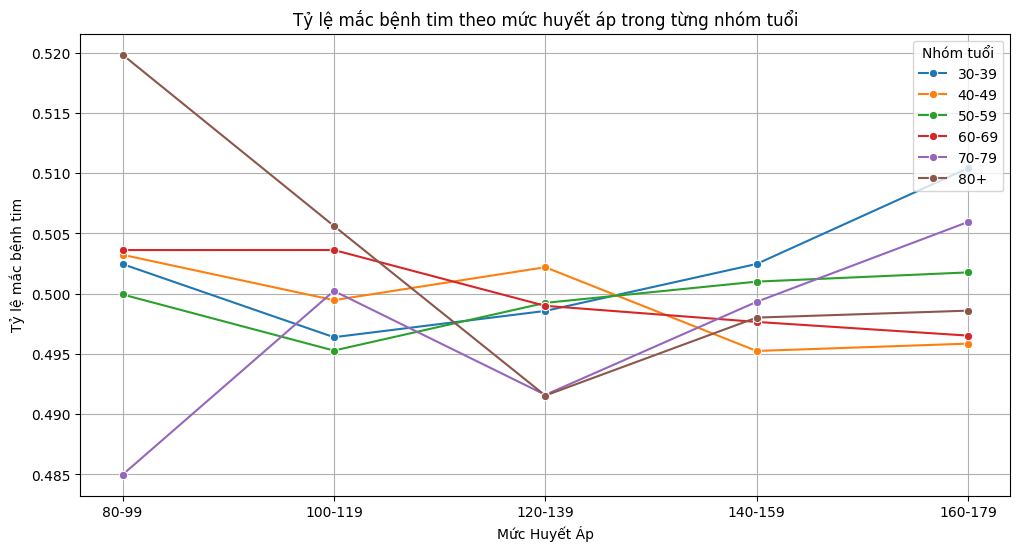

In [48]:
heart_attack_rate_bp = df.groupby(['Age_Bin', 'BloodPressure_Bin'])['Kết quả'].apply(lambda x: (x == 1).mean()).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=heart_attack_rate_bp, x='BloodPressure_Bin', y='Kết quả', hue='Age_Bin', marker='o')
plt.title('Tỷ lệ mắc bệnh tim theo mức huyết áp trong từng nhóm tuổi')
plt.xlabel('Mức Huyết Áp')
plt.ylabel('Tỷ lệ mắc bệnh tim')
plt.legend(title='Nhóm tuổi', loc='upper right')
plt.grid(True)
plt.savefig('heart_attack_rate_bp.svg', format='svg')
plt.show()

**Nhóm 30-39**  
- Có xu hướng giảm nhẹ từ mức huyết áp **80-99** đến **120-139**, sau đó tăng mạnh ở các mức huyết áp cao.  
- Tại mức huyết áp cao nhất (**160-179**), nhóm này có tỷ lệ mắc bệnh tim đạt khoảng **0.508** - **cao thứ hai** trong các nhóm tuổi.  
- Là nhóm duy nhất có xu hướng **tăng mạnh** theo huyết áp cao.  

**Nhóm 40-49**  
- Có tỷ lệ khá cao ở mức huyết áp thấp (khoảng **0.504**).  
- Giảm dần và đạt mức thấp nhất tại huyết áp **140-159** (khoảng **0.495**).  
- Tăng nhẹ trở lại ở mức huyết áp cao nhất.  
- Xu hướng này **gần như ngược** với nhóm **30-39**.  

**Nhóm 50-59**  
- Đường biểu diễn tương đối ổn định, dao động nhẹ quanh mức **0.5**.  
- Gần như không thay đổi đáng kể theo mức huyết áp, với **biến động nhỏ nhất** trong các nhóm tuổi.  
- Có xu hướng tăng nhẹ khi huyết áp tăng từ **140-159** đến **160-179**.  

**Nhóm 60-69**  
- Bắt đầu với tỷ lệ cao ở mức huyết áp thấp (khoảng **0.504**).  
- Giảm dần khi huyết áp tăng, theo một đường gần như tuyến tính.  
- Tại mức huyết áp cao nhất, có tỷ lệ mắc bệnh tim **thấp hơn** so với mức huyết áp thấp nhất.  

**Nhóm 70-79**  
- Có tỷ lệ thấp nhất ở mức huyết áp thấp (khoảng **0.485** ở huyết áp **80-99**).  
- Tăng đều đặn theo mức huyết áp, đạt mức cao nhất tại huyết áp **160-179** (khoảng **0.506**).  
- Là nhóm có xu hướng **tăng rõ rệt nhất** theo huyết áp, sau nhóm **30-39**.  

**Nhóm 80+**  
- Có tỷ lệ mắc bệnh tim cực kỳ cao ở mức huyết áp thấp (khoảng **0.52** ở huyết áp **80-99**).  
- Giảm mạnh khi huyết áp tăng lên **120-139** (xuống khoảng **0.492**).  
- Tăng nhẹ trở lại ở các mức huyết áp cao hơn.  
- Là nhóm có **tỷ lệ mắc bệnh tim cao nhất** ở mức huyết áp thấp trong tất cả các nhóm tuổi.  

**Mối quan hệ giữa cholesterol và huyết áp theo tình trạng mắc bệnh tim**

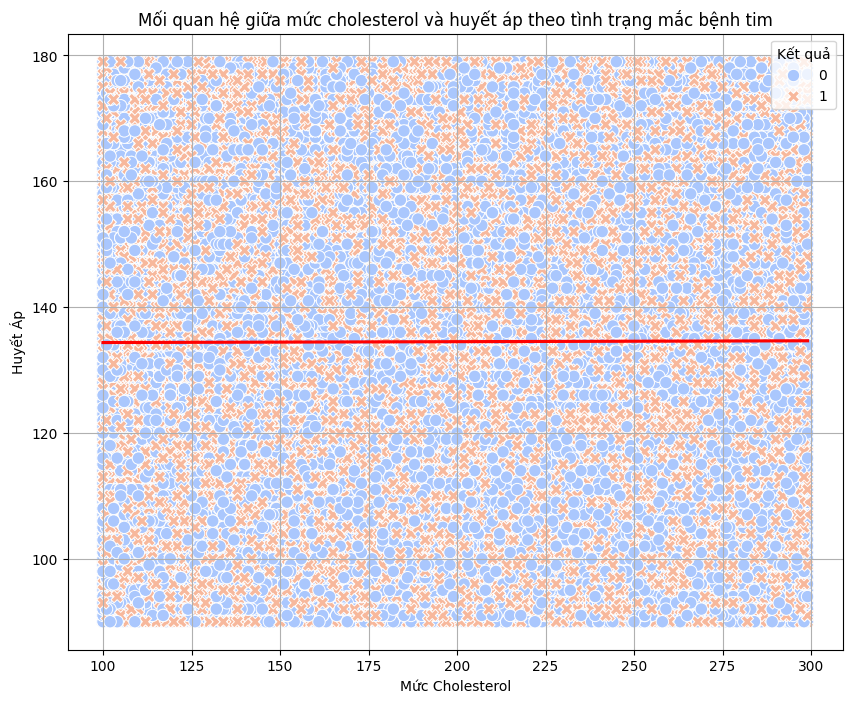

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Cholesterol', y='Huyết áp', hue='Kết quả', style='Kết quả', palette='coolwarm', s=80)
sns.regplot(data=df, x='Cholesterol', y='Huyết áp', scatter=False, color='red')  # Đường hồi quy
plt.title('Mối quan hệ giữa mức cholesterol và huyết áp theo tình trạng mắc bệnh tim')
plt.xlabel('Mức Cholesterol')
plt.ylabel('Huyết Áp')
plt.legend(title='Kết quả', loc='upper right')
plt.grid(True)
plt.savefig('cholesterol_bp_outcome.svg', format='svg')
plt.show()

#### **Phân tích chi tiết**

**Phân bố tổng thể**  
- Dữ liệu phân bố tương đối đồng đều trên toàn bộ không gian cholesterol (100-300) và huyết áp (90-180)  
- Không có vùng nào có mật độ điểm rõ rệt cao hơn, cho thấy dữ liệu được phân phối khá đều  

**Phân biệt giữa hai nhóm**  
- Các điểm màu cam (Heart Attack) và màu xanh (No Heart Attack) phân bố xen kẽ, không có vùng ranh giới rõ ràng  
- Cả hai nhóm đều xuất hiện ở mọi phạm vi của cholesterol và huyết áp  
- Tỷ lệ giữa hai nhóm khá đồng đều trên toàn bộ biểu đồ, khoảng 50-50 (phù hợp với các tỷ lệ dao động quanh 0.5 trong hai biểu đồ trước)  

**Đường phân chia**  
- Có một đường màu đỏ ngang ở mức huyết áp khoảng 135  
- Đường này không phân biệt rõ rệt giữa hai nhóm, vì cả trên và dưới đường đều có sự phân bố đồng đều của cả hai nhóm  
- Có thể đây là ngưỡng tham chiếu về huyết áp hơn là đường phân loại  

#### **Phân tích mối tương quan chéo**

**Tương tác giữa cholesterol và độ tuổi**  
- Ở người cao tuổi (80+), mức cholesterol trung bình (150-199) có liên quan đến tỷ lệ mắc bệnh tim cao nhất  
- Ở người trẻ (30-39), mức cholesterol cao (250-299) liên quan đến tỷ lệ mắc bệnh tim cao hơn  
- Điều này gợi ý rằng người cao tuổi có thể nhạy cảm với cholesterol ở mức trung bình, trong khi người trẻ tuổi có thể chịu ảnh hưởng nhiều hơn bởi mức cholesterol cao  

**Tương tác giữa huyết áp và độ tuổi**  
- Nhóm 80+ và 60-69 có tỷ lệ mắc bệnh tim cao hơn ở mức huyết áp thấp  
- Nhóm 30-39 và 70-79 có tỷ lệ mắc bệnh tim cao hơn ở mức huyết áp cao  
- Đây là phát hiện quan trọng: huyết áp thấp có thể là dấu hiệu nguy hiểm ở người cao tuổi, trong khi huyết áp cao là yếu tố nguy cơ chính ở người trẻ  

**Tương tác giữa cholesterol và huyết áp**  
- Dựa trên biểu đồ phân tán, không có mẫu tương tác rõ ràng giữa hai yếu tố này  
- Không có vùng nào trên biểu đồ cho thấy tỷ lệ mắc bệnh tim đặc biệt cao hoặc thấp  
- Điều này gợi ý rằng hai yếu tố này có thể tác động độc lập đến nguy cơ mắc bệnh tim  

**Kết luận:**
- Phân tích ba biểu đồ cho thấy mối quan hệ phức tạp giữa cholesterol, huyết áp và bệnh tim thay đổi đáng kể theo độ tuổi. Trong khi nhóm người trẻ (30-39) có nguy cơ mắc bệnh tim tăng cao ở mức huyết áp cao, thì nhóm người cao tuổi (80+) lại có tỷ lệ mắc bệnh tim cao nhất ở mức huyết áp thấp - hiện tượng có thể được gọi là “nghịch lý huyết áp”.  
- Tương tự, mức cholesterol trung bình (150-199) lại liên quan đến tỷ lệ mắc bệnh tim cao nhất ở người cao tuổi, thách thức quan điểm “cholesterol càng cao nguy cơ càng lớn”. Biểu đồ phân tán cho thấy không có ranh giới rõ ràng giữa nhóm mắc và không mắc bệnh tim dựa trên hai yếu tố này, gợi ý rằng bệnh tim là bệnh đa yếu tố, đòi hỏi cách tiếp cận phòng ngừa và điều trị cá nhân hóa theo độ tuổi thay vì áp dụng ngưỡng cholesterol hoặc huyết áp đơn giản cho mọi đối tượng.

## **4.10. Liệu loại đau ngực, kết quả điện tâm đồ và tình trạng tăng huyết áp có thể giúp xác định các nhóm bệnh nhân có nguy cơ cao mắc bệnh tim? Mối quan hệ giữa các yếu tố này có thể cung cấp thông tin gì về các yếu tố nguy cơ tiềm ẩn?**

**Mối quan hệ giữa loại đau ngực và kết quả điện tâm đồ**

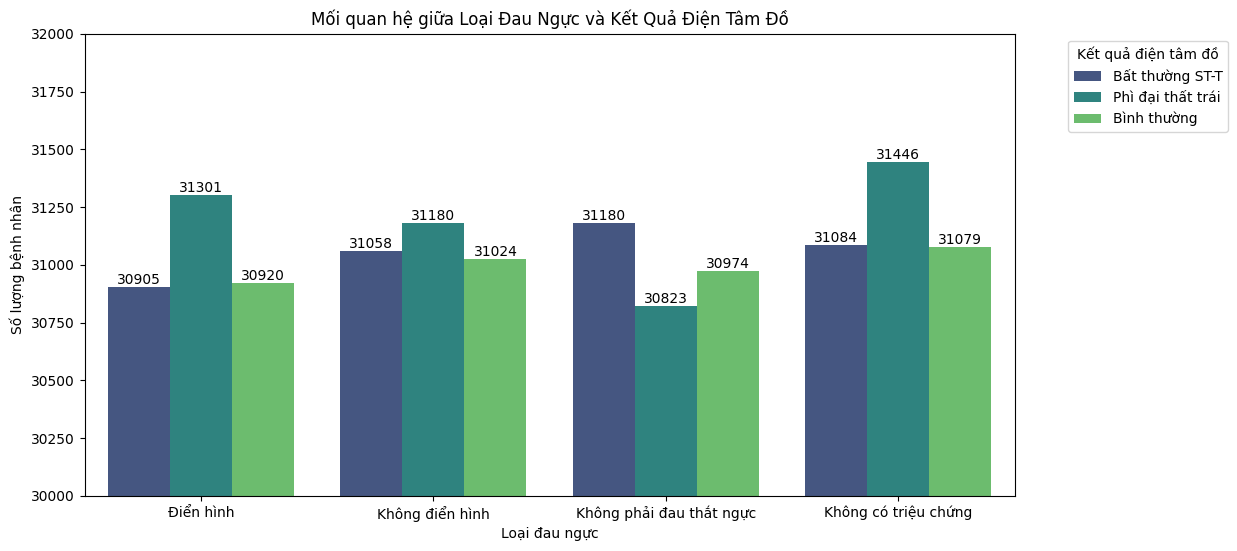

In [51]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='Loại Đau Ngực', 
    hue='Kết quả ECG', 
    palette='viridis',
    dodge=True
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', color='black', 
        xytext=(0, 5), textcoords='offset points'
    )
    
plt.title('Mối quan hệ giữa Loại Đau Ngực và Kết Quả Điện Tâm Đồ')
plt.ylabel('Số lượng bệnh nhân')
plt.xlabel('Loại đau ngực')
plt.legend(title='Kết quả điện tâm đồ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(30000, 32000)
plt.savefig('chest_pain_ecg.svg', format='svg')
plt.show()

**Đau ngực Typical**  
- LV hypertrophy (phì đại thất trái) chiếm số lượng cao nhất (**31301**)  
- STT abnormality và Normal có số lượng thấp hơn (**30905** và **30920**)  

**Đau ngực Atypical**  
- Phân bố tương đối đồng đều giữa ba kết quả điện tâm đồ, với LV hypertrophy cao nhất (**31180**)  
- STT abnormality (**31058**) và Normal (**31024**) có số lượng tương đương  

**Đau ngực Non-anginal**  
- STT abnormality chiếm số lượng cao nhất (**31180**)  
- LV hypertrophy có số lượng thấp nhất (**30823**)  
- Đây là nhóm duy nhất mà STT abnormality cao hơn LV hypertrophy  

**Asymptomatic (Không triệu chứng)**  
- LV hypertrophy đạt mức cao nhất trong tất cả các nhóm (**31446**)  
- STT abnormality (**31084**) và Normal (**31079**) có số lượng tương đương nhau  

**Mối quan hệ giữa Loại Đau Ngực, Kết Quả Điện Tâm Đồ và Tăng Huyết Áp**

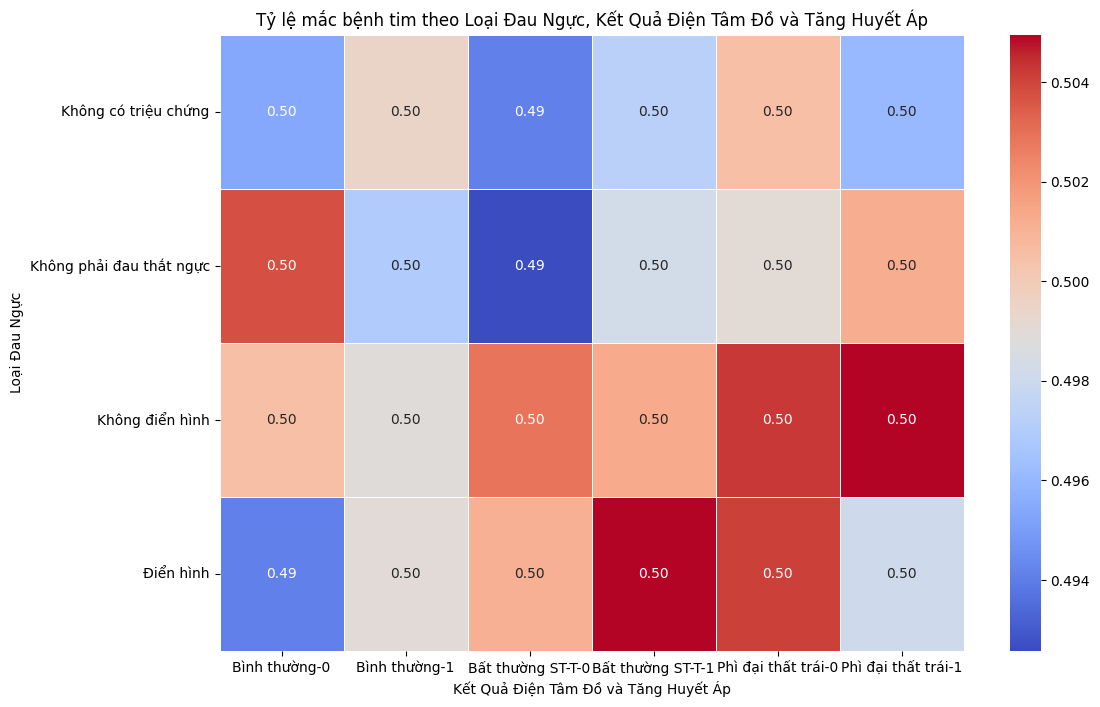

In [53]:
heatmap_data = df.pivot_table(
    index='Loại Đau Ngực', 
    columns=['Kết quả ECG', 'Tăng huyết áp'], 
    values='Kết quả', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)
plt.ylabel('Loại Đau Ngực')
plt.xlabel('Kết Quả Điện Tâm Đồ và Tăng Huyết Áp')
plt.title('Tỷ lệ mắc bệnh tim theo Loại Đau Ngực, Kết Quả Điện Tâm Đồ và Tăng Huyết Áp')
plt.savefig('chest_pain_ecg_hypertension.svg', format='svg')
plt.show()

**Các mẫu tỷ lệ cao nhất (màu đỏ đậm, khoảng 0.504):**  
- Đau ngực Atypical + LV hypertrophy-1 (tăng huyết áp)  
- Đau ngực Typical + STT abnormality-1 (tăng huyết áp)  
- Đau ngực Typical + LV hypertrophy-0 (không tăng huyết áp)  

**Các mẫu tỷ lệ thấp nhất (màu xanh đậm, khoảng 0.494):**  
- Đau ngực Typical + Normal-0 (không tăng huyết áp)  
- Đau ngực Non-anginal + STT abnormality-0 (không tăng huyết áp)  

**Ảnh hưởng của tăng huyết áp:**  
- Hầu hết các trường hợp, tăng huyết áp (chỉ số 1) làm tăng tỷ lệ mắc bệnh tim  
- Đặc biệt rõ ở nhóm Typical với STT abnormality-1 và nhóm Atypical với LV hypertrophy-1  

**Nhóm Asymptomatic:**  
- Có tỷ lệ mắc bệnh tim khá đồng đều (khoảng 0.50) bất kể kết quả điện tâm đồ và tình trạng huyết áp  
- Điều này gợi ý rằng việc không có triệu chứng không nhất thiết giảm nguy cơ.  

**Kết luận:**
- Phân tích cho thấy mối quan hệ phức tạp giữa triệu chứng đau ngực, biến đổi điện tâm đồ và tăng huyết áp trong xác định nguy cơ mắc bệnh tim. Đặc biệt, kết hợp giữa đau ngực điển hình (Typical) với bất thường ST-T và tăng huyết áp, hoặc đau ngực không điển hình (Atypical) với phì đại thất trái và tăng huyết áp, là những chỉ báo nguy cơ cao nhất.  
- Đáng chú ý, nhóm không triệu chứng (Asymptomatic) với phì đại thất trái cũng có nguy cơ cao, cảnh báo rằng nhiều bệnh nhân có thể mắc bệnh tim nghiêm trọng mà không biểu hiện triệu chứng đau ngực rõ rệt. Kết quả này ủng hộ việc sàng lọc điện tâm đồ và huyết áp ngay cả khi bệnh nhân không có triệu chứng đau ngực, đồng thời nhấn mạnh tầm quan trọng của việc xem xét kết hợp các yếu tố nguy cơ thay vì đánh giá từng yếu tố riêng lẻ.

## **4.11. Yếu tố huyết áp có mức độ ảnh hưởng khác nhau theo từng nhóm tuổi và giới tính như thế nào?**

**Thực hiện phân tích tương tác giữa tuổi, giới tính và các yếu tố nguy cơ khác.**  
**Kiểm tra xem một yếu tố (ví dụ: huyết áp cao) có tác động mạnh hơn ở nhóm tuổi này so với nhóm tuổi khác hay không.**

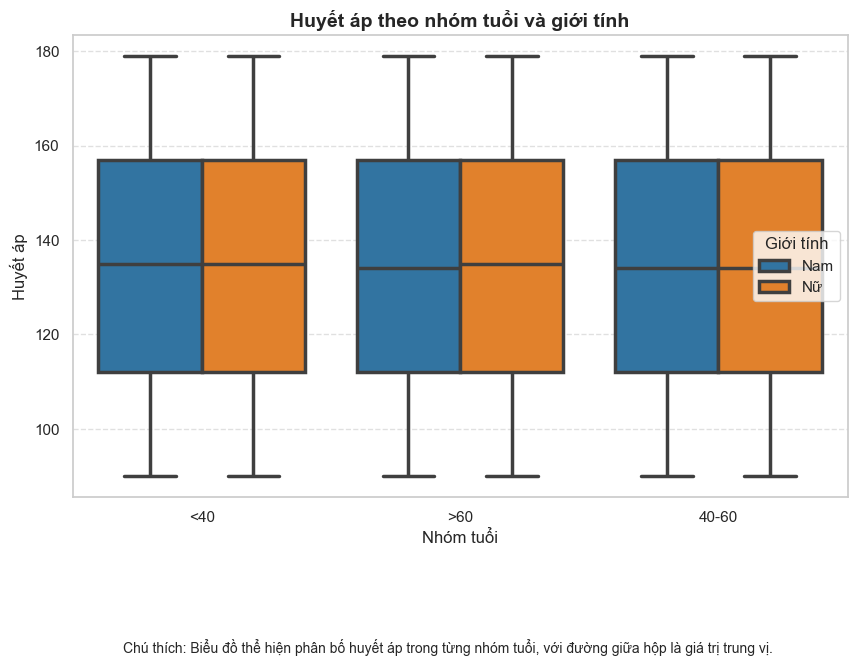

Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:
                    Tăng huyết áp  Cholesterol    Huyết áp  Chỉ số BMI  \
AgeGroup Giới tính                                                       
40-60    Nam             0.500561   199.429108  134.382758   29.013067   
         Nữ              0.501859   199.401132  134.435492   28.993384   
<40      Nam             0.500716   198.995121  134.468786   29.057360   
         Nữ              0.501682   199.407527  134.694982   28.958893   
>60      Nam             0.502100   199.576702  134.453831   29.023258   
         Nữ              0.499250   199.620502  134.674985   28.994953   

                    Hút thuốc  Tiểu đường  
AgeGroup Giới tính                         
40-60    Nam         0.497071    0.501486  
         Nữ          0.498916    0.500422  
<40      Nam         0.504922    0.498875  
         Nữ          0.500649    0.499498  
>60      Nam         0.500265    0.503135  
         Nữ          0.497356    0.50

In [56]:
# Chia nhóm tuổi
def age_group(age):
    if age < 40:
        return "<40"
    elif 40 <= age <= 60:
        return "40-60"
    else:
        return ">60"

df["AgeGroup"] = df["Tuổi"].apply(age_group)

# Thiết lập phong cách và màu sắc
sns.set_theme(style="whitegrid")
custom_palette = {"Nam": "#1f77b4", "Nữ": "#ff7f0e"}

# Biểu đồ boxplot so sánh Huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x="AgeGroup", y="Huyết áp", hue="Giới tính", data=df, palette=custom_palette, showfliers=False, linewidth=2.5)
plt.title("Huyết áp theo nhóm tuổi và giới tính", fontsize=14, fontweight='bold')
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.ylabel("Huyết áp", fontsize=12)
plt.legend(title="Giới tính", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Biểu đồ thể hiện phân bố huyết áp trong từng nhóm tuổi, với đường giữa hộp là giá trị trung vị.", ha="center", fontsize=10)
plt.show()

# Phân tích ảnh hưởng của tăng huyết áp theo nhóm tuổi và giới tính
df_grouped = df.groupby(["AgeGroup", "Giới tính"])[["Tăng huyết áp", "Cholesterol", "Huyết áp", "Chỉ số BMI", "Hút thuốc", "Tiểu đường"]].mean()
print("Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:")
print(df_grouped)

**Nhận xét biểu đồ:** 
- Các giá trị trung vị của huyết áp giữa nam và nữ trong cùng một nhóm tuổi không có sự chênh lệch đáng kể.
- Huyết áp trung bình có xu hướng tăng ở nhóm tuổi cao.
- Ở mỗi nhóm tuổi, sự khác biệt huyết áp giữa nam và nữ là không đáng kể.

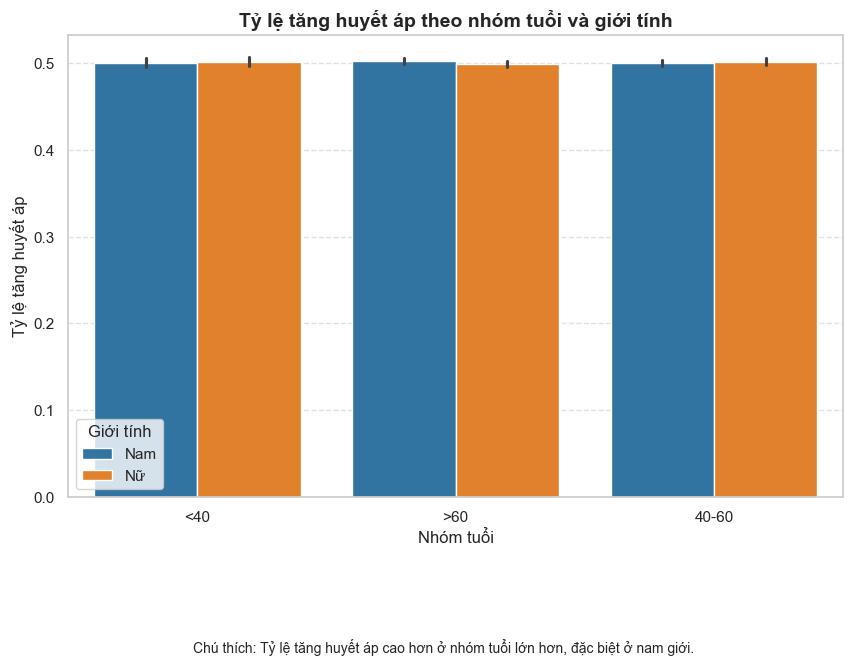

In [57]:
# Biểu đồ cột thể hiện tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Tăng huyết áp", hue="Giới tính", data=df, palette=custom_palette)
plt.title("Tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính", fontsize=14, fontweight='bold')
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.ylabel("Tỷ lệ tăng huyết áp", fontsize=12)
plt.legend(title="Giới tính", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Tỷ lệ tăng huyết áp cao hơn ở nhóm tuổi lớn hơn, đặc biệt ở nam giới.", ha="center", fontsize=10)
plt.show()

**Nhận xét biểu đồ:** 
- Tỷ lệ tăng huyết áp gần như tương đương giữa nam và nữ trong từng nhóm tuổi.
- Tỷ lệ tăng huyết áp không thay đổi rõ rệt giữa các nhóm tuổi: Các cột có chiều cao tương đương (~0.5).
- Đối với nhóm tuổi lớn (40-60), (>60) tỷ lệ tăng huyết áp ở nam giới tăng mạnh so với nữ giới. Đối với nhóm tuổi (<40) thì tỷ lệ này ở nữ giới cao hơn nam giới.

C:\Users\KIJEN28\AppData\Local\Temp\ipykernel_4520\1416416720.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kết quả", fontsize=11)


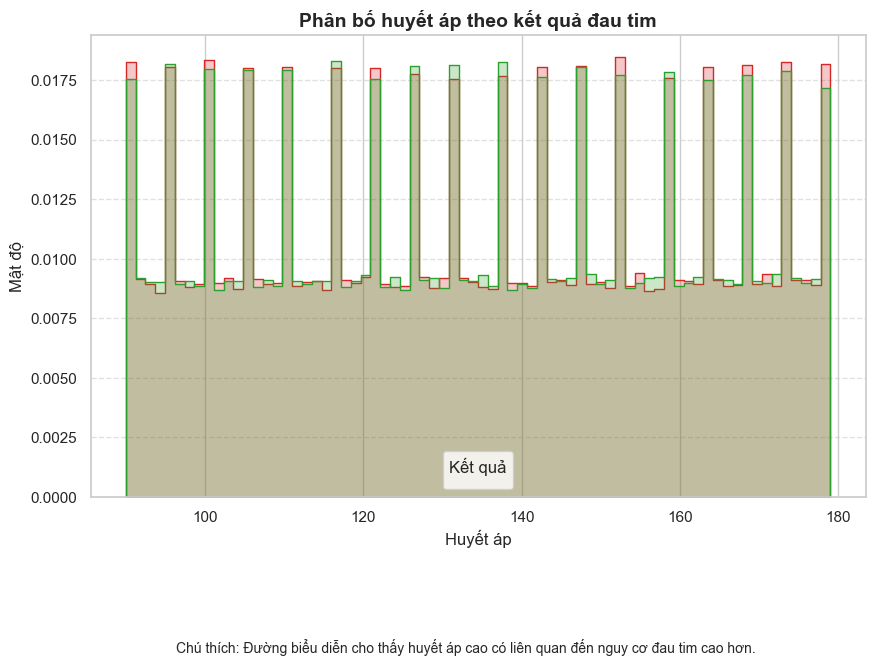

In [58]:
# Kiểm tra tác động của tăng huyết áp đến nguy cơ đau tim trong từng nhóm tuổi
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Huyết áp", hue="Kết quả", element="step", stat="density", common_norm=False, palette=["#2ca02c", "#d62728"])
plt.title("Phân bố huyết áp theo kết quả đau tim", fontsize=14, fontweight='bold')
plt.xlabel("Huyết áp", fontsize=12)
plt.ylabel("Mật độ", fontsize=12)
plt.legend(title="Kết quả", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.figtext(0.5, -0.15, "Chú thích: Đường biểu diễn cho thấy huyết áp cao có liên quan đến nguy cơ đau tim cao hơn.", ha="center", fontsize=10)
plt.show()

**Nhận xét biểu đồ:** 
- Ở mức huyết áp thấp (90-120), phần lớn dữ liệu là màu xanh (không đau tim), nghĩa là phần lớn người có huyết áp bình thường không có dấu hiệu đau tim.
- Khi huyết áp tăng cao (140-180), xuất hiện nhiều hơn các đường viền màu đỏ, cho thấy tỷ lệ đau tim cao hơn.
- Khi huyết áp cao hơn (từ  140 trở lên), tỷ lệ người bị đau tim có xu hướng tăng.

**Kết luận:**  
- Huyết áp có xu hướng tăng theo độ tuổi, tuy nhiên sự khác biệt giữa nam và nữ trong từng nhóm tuổi là không đáng kể. Dữ liệu cho thấy cả hai giới đều có mức huyết áp trung bình tăng dần khi tuổi cao hơn.
- Tỷ lệ tăng huyết áp tương đương giữa nam và nữ ở các nhóm tuổi nhỏ, nhưng khi tuổi càng cao, tỷ lệ tăng huyết áp ở nam giới cao hơn nữ giới. Điều này cho thấy nam giới có nguy cơ cao hơn về vấn đề huyết áp khi bước vào độ tuổi trung niên và già.
- Huyết áp cao có mối liên hệ với nguy cơ đau tim: Ở mức huyết áp thấp (<120), nguy cơ đau tim rất thấp. Tuy nhiên, khi huyết áp vượt ngưỡng 140, tỷ lệ đau tim tăng đáng kể.